# BioBERT case

# 1. Bar plot 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Timestamp
from datetime import datetime, timezone

OmicronSymFreqBioBERT = pd.read_csv('./output_files/2021Dec2022Mar/Freq_by_user_BioBERT.csv')
DeltaSymFreqBioBERT = pd.read_csv('./output_files/2021JulAugSep/Freq_by_user_BioBERT.csv')
EarlySymFreqBioBERT = pd.read_csv('./output_files/2020MarAprMay/Freq_by_user_BioBERT.csv')


In [2]:
plot_DeltaBioBERT = DeltaSymFreqBioBERT.sort_values(by='freq', ascending=False)[:15]
plot_OmicronBioBERT =  OmicronSymFreqBioBERT.sort_values(by='freq', ascending=False)[:15]

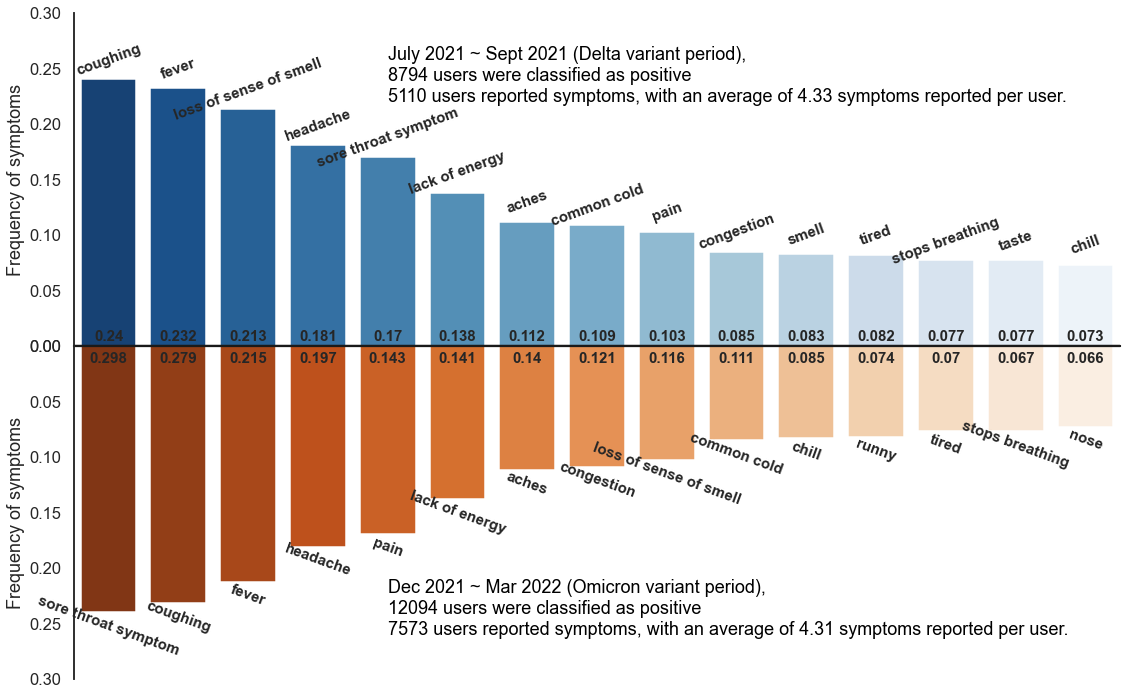

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", context="talk")
f, (ax1, ax2)  = plt.subplots(2, 1, figsize=(16, 10), sharex=True)
x1 = np.array(plot_DeltaBioBERT['index'])
y1 = np.array(plot_DeltaBioBERT.freq)
Delta_bar = sns.barplot(x=x1, y=y1, palette="Blues_r", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Frequency of symptoms")
ax1.set_ylim([0, 0.3])
ax1.set(xlabel=None)
ax1.set(xticklabels=[])  # remove the tick labels
for i in range(len(Delta_bar.patches)):
    p = Delta_bar.patches[i]
    Delta_bar.annotate(x1[i],
                   (p.get_x() + p.get_width() / 2., p.get_height()+0.01), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), size=15, rotation=20, weight='bold',
                   textcoords = 'offset points')
    Delta_bar.annotate( round(y1[i],3),
               (p.get_x() + p.get_width() / 2., 0.0), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), size=15, rotation=0, weight='bold',
               textcoords = 'offset points')

ax1.text(4, 0.22, "July 2021 ~ Sept 2021 (Delta variant period), \n8794 users were classified as positive \n5110 users reported symptoms, with an average of 4.33 symptoms reported per user.",
         horizontalalignment='left', size='medium', color='black')


######################
x2 = np.array(plot_OmicronBioBERT['index'])
y2 = np.array(plot_OmicronBioBERT.freq)
Omicron_bar = sns.barplot(x=x2, y=y1, palette="Oranges_r", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Frequency of symptoms")
ax2.set_ylim([0, 0.3])
ax2.set(xlabel=None)
ax2.set(xticklabels=[])  # remove the tick labels
for i in range(len(Omicron_bar.patches)):
    p = Omicron_bar.patches[i]
    Omicron_bar.annotate(x2[i],
                   (p.get_x() + p.get_width() / 2, p.get_height()+0.02), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), size=15, rotation=-20, weight='bold',
                   textcoords = 'offset points')
    Omicron_bar.annotate(round(y2[i],3),
           (p.get_x() + p.get_width() / 2., 0.02), 
           ha = 'center', va = 'center', 
           xytext = (0, 9), size=15, rotation=0, weight='bold',
           textcoords = 'offset points')
Omicron_bar.invert_yaxis()
ax2.text(4, 0.26, "Dec 2021 ~ Mar 2022 (Omicron variant period), \n12094 users were classified as positive \n7573 users reported symptoms, with an average of 4.31 symptoms reported per user.",
         horizontalalignment='left', size='medium', color='black')


sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
sns.despine(bottom=True)
plt.tight_layout(h_pad=-0.86)


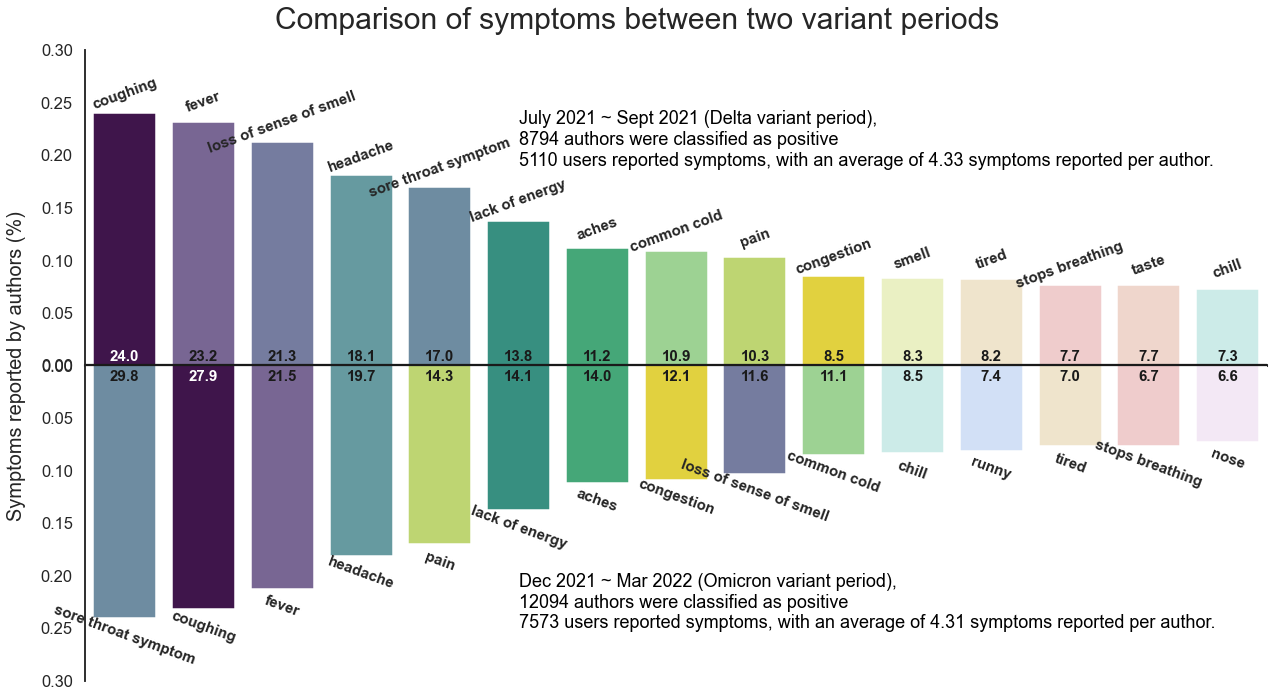

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sym_col_dic = {'coughing':"#440c54", 'fever':"#765e9a", 'loss of sense of smell':"#6e77a6",
       'sore throat symptom':"#658eaa", 'headache':"#5ca2aa", 'lack of energy':"#289e89", 
        'aches':"#35b779",'common cold':"#96dc88", 'pain':"#c7e661", 
        'congestion':"#fce624", 'stops breathing':"#f5c6c6", 'tired': "#f5e6c6",
       'chill':"#c7f0ec", 'inflammation':"#f2e9e9", 'nose':"#f4e6f7", 'runny':"#ccdffc", 'smell':"#f0f7bc", 'taste':"#f5d4c6"}

sns.set_theme(style="white", context="talk")
f, (ax1, ax2)  = plt.subplots(2, 1, figsize=(18, 10), sharex=True)
x1 = np.array(plot_DeltaBioBERT['index'])
y1 = np.array(plot_DeltaBioBERT.freq)
Delta_bar = sns.barplot(x=x1, y=y1, palette= sns.color_palette([sym_col_dic[i] for i in x1]), ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Symptoms reported by authors (%)", fontsize =20)
ax1.yaxis.set_label_coords(-0.05, .0) #y label position

ax1.set_ylim([0, 0.3])
ax1.set(xlabel=None)
ax1.set(xticklabels=[])  # remove the tick labels
for i in range(len(Delta_bar.patches)):
    p = Delta_bar.patches[i]
    Delta_bar.annotate(x1[i],
                   (p.get_x() + p.get_width() / 2., p.get_height()+0.01), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), size=15, rotation=20, weight='bold',
                   textcoords = 'offset points')
    ## add frequency rate:
    if i==0:
        Delta_bar.annotate(round(y1[i]*100,3),  (p.get_x() + p.get_width() / 2., 0.0), ha = 'center', va = 'center', 
                   xytext = (0, 9), size=15, rotation=0, weight='bold',color='w', textcoords = 'offset points')
    else: 
        Delta_bar.annotate(round(y1[i]*100,3),  (p.get_x() + p.get_width() / 2., 0.0), ha = 'center', va = 'center', 
                   xytext = (0, 9), size=15, rotation=0, weight='bold',color='k', textcoords = 'offset points')

ax1.text(5, 0.19, "July 2021 ~ Sept 2021 (Delta variant period), \n8794 authors were classified as positive \n5110 users reported symptoms, with an average of 4.33 symptoms reported per author.",
         horizontalalignment='left', size='medium', color='black')

######################
x2 = np.array(plot_OmicronBioBERT['index'])
y2 = np.array(plot_OmicronBioBERT.freq)
Omicron_bar = sns.barplot(x=x2, y=y1, palette= sns.color_palette([sym_col_dic[i] for i in x2]), ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylim([0, 0.3])
ax2.set(xlabel=None)
ax2.set(xticklabels=[])  # remove the tick labels
for i in range(len(Omicron_bar.patches)):
    p = Omicron_bar.patches[i]
    Omicron_bar.annotate(x2[i],
                   (p.get_x() + p.get_width() / 2, p.get_height()+0.025), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), size=15, rotation=-20, weight='bold',
                   textcoords = 'offset points')
    ## add frequency rate:
    if i==1:
        Omicron_bar.annotate(round(y2[i]*100,3), (p.get_x() + p.get_width() / 2., 0.02), ha = 'center', va = 'center', 
               xytext = (0, 9), size=15, rotation=0, weight='bold',color='w',textcoords = 'offset points')
    else: 
        Omicron_bar.annotate(round(y2[i]*100,3), (p.get_x() + p.get_width() / 2., 0.02), ha = 'center', va = 'center', 
           xytext = (0, 9), size=15, rotation=0, weight='bold',color='k', textcoords = 'offset points')

Omicron_bar.invert_yaxis()
ax2.text(5, 0.25, "Dec 2021 ~ Mar 2022 (Omicron variant period), \n12094 authors were classified as positive \n7573 users reported symptoms, with an average of 4.31 symptoms reported per author.",
         horizontalalignment='left', size='medium', color='black')
ax1.text(6.5, 0.32, 'Comparison of symptoms between two variant periods', ha='center',fontsize=30)

sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
sns.despine(bottom=True)
plt.tight_layout(h_pad=-0.86)


# 2. ThemeRiver Plot

In [5]:
timebased_syms_Early_BERTlarge = pd.read_csv('./output_files/2020MarAprMay/timebased_syms_Early_BERTlarge.csv')
timebased_syms_Early_BioBERTlarge = pd.read_csv('./output_files/2020MarAprMay/timebased_syms_Early_BioBERTlarge.csv')
timebased_syms_Delta_BERTlarge = pd.read_csv('./output_files/2021JulAugSep/timebased_syms_Delta_BERTlarge.csv')
timebased_syms_Delta_BioBERTlarge = pd.read_csv('./output_files/2021JulAugSep/timebased_syms_Delta_BioBERTlarge.csv')
timebased_syms_Omicron_BERTlarge = pd.read_csv('./output_files/2021Dec2022Mar/timebased_syms_Omicron_BERTlarge.csv')
timebased_syms_Omicron_BioBERTlarge = pd.read_csv('./output_files/2021Dec2022Mar/timebased_syms_Omicron_BioBERTlarge.csv')


## 2.1 ThemeRiver Plot: Delta

In [6]:
timebased_syms_Delta_BioBERTlarge

,author,time,symptoms
0,----banana----,2021-07-10 22:55:53,"['taste', 'smell', 'coughing', 'loss of sense ..."
1,--ozzy--,2021-08-02 04:56:18,['taste']
2,-1911-,2021-09-13 17:48:42,"['terrible', 'fever', 'lack of energy', 'cough..."
3,-FuckleberryHinn-,2021-08-19 08:10:53,[' ']
4,-InTheRain,2021-07-25 00:43:53,['hypochondriasis']
...,...,...,...
28886,zxykzxyk,2021-07-18 15:36:11,"['coughing', 'headache', 'lack of energy', 'lo..."
28887,zxykzxyk,2021-07-18 17:11:32,[]
28888,zyadox_,2021-08-19 08:02:25,[]
28889,zyadox_,2021-09-02 12:19:07,"['loss of sense of smell', 'smell', ' ']"


In [7]:
import ast
from datetime import datetime
ThemeRiver_dataDeltaBioBERT = timebased_syms_Delta_BioBERTlarge.copy()
ThemeRiver_dataDeltaBioBERT['symptoms'] = ThemeRiver_dataDeltaBioBERT['symptoms'].apply(lambda x: ast.literal_eval(x)).apply(','.join)
ThemeRiver_dataDeltaBioBERT = (ThemeRiver_dataDeltaBioBERT.set_index(['author', 'time'])
                   .apply(lambda x: x.str.split(",").explode()).reset_index())
ThemeRiver_dataDeltaBioBERT['time'] =ThemeRiver_dataDeltaBioBERT['time'].apply(lambda x: x.split()[0]) #remove hh:mm:ss in  date 
ThemeRiver_dataDeltaBioBERT['symptoms'].replace('', np.nan, inplace=True) #replace '' to nan
ThemeRiver_dataDeltaBioBERT = ThemeRiver_dataDeltaBioBERT.dropna() #remove nan rows
ThemeRiver_dataDeltaBioBERT = ThemeRiver_dataDeltaBioBERT.drop(['author'], axis=1)
ThemeRiver_dataDeltaBioBERT['symptoms_count'] = ThemeRiver_dataDeltaBioBERT.groupby(['time','symptoms'])['symptoms'].transform('count') #count symptom frequency
ThemeRiver_dataDeltaBioBERT = ThemeRiver_dataDeltaBioBERT.sort_values(by=['time']) #sorted by time
ThemeRiver_dataDeltaBioBERT = ThemeRiver_dataDeltaBioBERT.drop_duplicates() #drop duplicate rows
ThemeRiver_dataDeltaBioBERT['time'] = pd.to_datetime(ThemeRiver_dataDeltaBioBERT['time'], format='%Y-%m-%d')


In [8]:
#only consider some high-frequent symptoms
freq_num = 10
sym_select_DeltaBioBERT = DeltaSymFreqBioBERT.sort_values(by=['freq'],ascending =False).iloc[:freq_num, 0]
ThemeRiver_Delta_selectBioBERT = ThemeRiver_dataDeltaBioBERT.copy()
for index in ThemeRiver_Delta_selectBioBERT.index:
    if ThemeRiver_Delta_selectBioBERT.loc[index].symptoms not in set(sym_select_DeltaBioBERT):
        ThemeRiver_Delta_selectBioBERT = ThemeRiver_Delta_selectBioBERT.drop([index])
ThemeRiver_Delta_selectBioBERT  = ThemeRiver_Delta_selectBioBERT.sort_values(["time","symptoms"])  
ThemeRiver_Delta_selectBioBERT

,time,symptoms,symptoms_count
34025,2021-07-01,aches,2
28914,2021-07-01,common cold,1
44014,2021-07-01,coughing,7
44012,2021-07-01,fever,4
20219,2021-07-01,headache,3
...,...,...,...
15546,2021-10-01,headache,1
12639,2021-10-01,lack of energy,5
14827,2021-10-01,loss of sense of smell,3
42055,2021-10-01,pain,1


In [9]:
ThemeRiver_Delta_select_wideBioBERT = ThemeRiver_Delta_selectBioBERT.pivot(index='time',columns='symptoms',values='symptoms_count')
ThemeRiver_Delta_select_wideBioBERT = ThemeRiver_Delta_select_wideBioBERT.fillna(0)
ThemeRiver_Delta_select_wideBioBERT = ThemeRiver_Delta_select_wideBioBERT.reset_index().rename_axis(None, axis=1)
ThemeRiver_Delta_select_wideBioBERT = ThemeRiver_Delta_select_wideBioBERT.reindex(columns=['time']+list(sym_select_DeltaBioBERT))
time =  ThemeRiver_Delta_select_wideBioBERT.time
symptom_labels = [i for i in list(ThemeRiver_Delta_select_wideBioBERT.columns) if i !='time']
daySymFreq = [np.array(ThemeRiver_Delta_select_wideBioBERT.iloc[:,i]).astype('int') 
              for i in range(1,ThemeRiver_Delta_select_wideBioBERT.shape[1])]
ThemeRiver_Delta_select_wideBioBERT


,time,coughing,fever,loss of sense of smell,headache,sore throat symptom,lack of energy,aches,common cold,pain,congestion
0,2021-07-01,7.0,4.0,1.0,3.0,4.0,4.0,2.0,1.0,6.0,0.0
1,2021-07-02,4.0,10.0,2.0,10.0,6.0,6.0,8.0,5.0,5.0,0.0
2,2021-07-03,7.0,10.0,19.0,5.0,7.0,2.0,3.0,4.0,5.0,3.0
3,2021-07-04,9.0,5.0,10.0,9.0,7.0,8.0,4.0,6.0,5.0,2.0
4,2021-07-05,18.0,12.0,19.0,9.0,3.0,2.0,1.0,5.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
88,2021-09-27,14.0,10.0,13.0,10.0,6.0,8.0,5.0,6.0,4.0,2.0
89,2021-09-28,14.0,8.0,9.0,11.0,11.0,8.0,5.0,5.0,8.0,6.0
90,2021-09-29,21.0,10.0,9.0,11.0,8.0,6.0,3.0,5.0,9.0,7.0
91,2021-09-30,15.0,13.0,14.0,7.0,9.0,10.0,5.0,4.0,5.0,4.0


In [10]:
from scipy import stats
def gaussian_smooth(x, y, grid, sd):
    weights = np.transpose([stats.norm.pdf(grid, m, sd) for m in x])
    #weights = weights / weights.sum(0)
    return (weights * y).sum(1)

## 2.2 ThemeRiver Plot: Omicron

In [11]:
timebased_syms_Omicron_BioBERTlarge

,author,time,symptoms
0,-01101101-,2022-01-18 00:42:47,['blood']
1,-1911-,2022-01-21 21:31:15,"['smell', 'smell', 'smell', 'body']"
2,-1911-,2022-01-24 21:21:15,[]
3,-Boy-Mom,2021-12-22 03:36:39,"['nose', 'stops breathing']"
4,-CryptoSardine-,2022-01-01 23:26:51,"['sweating symptom', 'aches', 'fever', 'trouble']"
...,...,...,...
26853,zzcczzcc,2022-01-16 01:19:50,"['smell', 'congestion', 'whisky']"
26854,zzcczzcc,2022-01-16 13:35:52,"['smell', 'nasal congestion', 'stops breathing..."
26855,zzcczzcc,2022-01-18 00:37:13,[]
26856,zzcczzcc,2022-01-20 06:01:47,['sleep']


In [12]:
import ast
from datetime import datetime
ThemeRiver_dataOmicronBioBERT = timebased_syms_Omicron_BioBERTlarge.copy()
ThemeRiver_dataOmicronBioBERT['symptoms'] = ThemeRiver_dataOmicronBioBERT['symptoms'].apply(lambda x: ast.literal_eval(x)).apply(','.join)
ThemeRiver_dataOmicronBioBERT = (ThemeRiver_dataOmicronBioBERT.set_index(['author', 'time'])
                   .apply(lambda x: x.str.split(",").explode()).reset_index())
ThemeRiver_dataOmicronBioBERT['time'] =ThemeRiver_dataOmicronBioBERT['time'].apply(lambda x: x.split()[0]) #remove hh:mm:ss in  date 
ThemeRiver_dataOmicronBioBERT['symptoms'].replace('', np.nan, inplace=True) #replace '' to nan
ThemeRiver_dataOmicronBioBERT= ThemeRiver_dataOmicronBioBERT.dropna() #remove nan rows
ThemeRiver_dataOmicronBioBERT = ThemeRiver_dataOmicronBioBERT.drop(['author'], axis=1)
ThemeRiver_dataOmicronBioBERT['symptoms_count'] = ThemeRiver_dataOmicronBioBERT.groupby(['time','symptoms'])['symptoms'].transform('count') #count symptom frequency
ThemeRiver_dataOmicronBioBERT = ThemeRiver_dataOmicronBioBERT.sort_values(by=['time']) #sorted by time
ThemeRiver_dataOmicronBioBERT= ThemeRiver_dataOmicronBioBERT.drop_duplicates() #drop duplicate rows
ThemeRiver_dataOmicronBioBERT['time'] = pd.to_datetime(ThemeRiver_dataOmicronBioBERT['time'], format='%Y-%m-%d')


In [13]:
#only consider some high-frequent symptoms
freq_num = 10
sym_select_OmicronBioBERT = OmicronSymFreqBioBERT.sort_values(by=['freq'],ascending =False).iloc[:freq_num, 0]
ThemeRiver_Omicron_selectBioBERT = ThemeRiver_dataOmicronBioBERT.copy()
for index in ThemeRiver_Omicron_selectBioBERT.index:
    if ThemeRiver_Omicron_selectBioBERT.loc[index].symptoms not in set(sym_select_OmicronBioBERT):
        ThemeRiver_Omicron_selectBioBERT = ThemeRiver_Omicron_selectBioBERT.drop([index])
ThemeRiver_Omicron_selectBioBERT  = ThemeRiver_Omicron_selectBioBERT.sort_values(["time","symptoms"])  
ThemeRiver_Omicron_selectBioBERT

,time,symptoms,symptoms_count
31780,2021-12-15,aches,6
10385,2021-12-15,common cold,10
49402,2021-12-15,congestion,5
15327,2021-12-15,coughing,17
15328,2021-12-15,fever,12
...,...,...,...
23880,2022-03-10,headache,2
45611,2022-03-10,lack of energy,2
33684,2022-03-10,loss of sense of smell,1
23876,2022-03-10,pain,2


In [14]:
ThemeRiver_Omicron_select_wideBioBERT = ThemeRiver_Omicron_selectBioBERT.pivot(index='time',columns='symptoms',values='symptoms_count')
ThemeRiver_Omicron_select_wideBioBERT = ThemeRiver_Omicron_select_wideBioBERT.fillna(0)
ThemeRiver_Omicron_select_wideBioBERT = ThemeRiver_Omicron_select_wideBioBERT.reset_index().rename_axis(None, axis=1)
ThemeRiver_Omicron_select_wideBioBERT = ThemeRiver_Omicron_select_wideBioBERT.reindex(columns=['time']+list(sym_select_OmicronBioBERT))
time =  ThemeRiver_Omicron_select_wideBioBERT.time
symptom_labels = [i for i in list(ThemeRiver_Omicron_select_wideBioBERT.columns) if i !='time']
daySymFreq = [np.array(ThemeRiver_Omicron_select_wideBioBERT.iloc[:,i]).astype('int') 
              for i in range(1,ThemeRiver_Omicron_select_wideBioBERT.shape[1])]
ThemeRiver_Omicron_select_wideBioBERT

,time,sore throat symptom,coughing,fever,headache,pain,lack of energy,aches,congestion,loss of sense of smell,common cold
0,2021-12-15,8.0,17.0,12.0,13.0,6.0,4.0,6.0,5.0,13.0,10.0
1,2021-12-16,20.0,19.0,20.0,14.0,9.0,8.0,12.0,12.0,21.0,9.0
2,2021-12-17,40.0,31.0,28.0,31.0,31.0,7.0,13.0,9.0,11.0,17.0
3,2021-12-18,33.0,32.0,26.0,31.0,13.0,13.0,19.0,14.0,20.0,15.0
4,2021-12-19,52.0,37.0,17.0,33.0,33.0,19.0,21.0,16.0,36.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...
81,2022-03-06,5.0,6.0,8.0,7.0,4.0,1.0,3.0,3.0,2.0,0.0
82,2022-03-07,9.0,6.0,0.0,1.0,3.0,5.0,1.0,1.0,2.0,2.0
83,2022-03-08,12.0,9.0,8.0,7.0,6.0,7.0,7.0,1.0,8.0,2.0
84,2022-03-09,21.0,13.0,7.0,8.0,8.0,1.0,3.0,6.0,2.0,9.0


## 2.3 ThemeRiver Plot: Early stage

In [15]:
timebased_syms_Early_BioBERTlarge

,author,time,symptoms
0,_iwasnotmagnificent_,2020-04-01 15:22:15,"['dyspnea', 'loss of sense of smell', 'tightne..."
1,_iwasnotmagnificent_,2020-04-01 23:10:22,['belly']
2,_iwasnotmagnificent_,2020-04-03 02:18:37,"['eructation', 'nose']"
3,_iwasnotmagnificent_,2020-04-04 18:21:12,"['dizziness', 'otalgia', 'loss of sense of sme..."
4,_iwasnotmagnificent_,2020-04-03 16:39:57,[]
...,...,...,...
3925,zwordz23,2020-05-29 23:23:50,['fever']
3926,zwordz23,2020-05-30 14:06:47,[]
3927,zwordz23,2020-05-30 15:50:03,"['exertion', 'alcohol-containing product']"
3928,zwordz23,2020-05-30 15:51:10,"['exertion', 'alcohol-containing product']"


In [16]:
import ast
from datetime import datetime
ThemeRiver_dataEarlyBioBERT = timebased_syms_Early_BioBERTlarge.copy()
ThemeRiver_dataEarlyBioBERT['symptoms'] = ThemeRiver_dataEarlyBioBERT['symptoms'].apply(lambda x: ast.literal_eval(x)).apply(','.join)
ThemeRiver_dataEarlyBioBERT = (ThemeRiver_dataEarlyBioBERT.set_index(['author', 'time'])
                   .apply(lambda x: x.str.split(",").explode()).reset_index())
ThemeRiver_dataEarlyBioBERT['time'] =ThemeRiver_dataEarlyBioBERT['time'].apply(lambda x: x.split()[0]) #remove hh:mm:ss in  date 
ThemeRiver_dataEarlyBioBERT['symptoms'].replace('', np.nan, inplace=True) #replace '' to nan
ThemeRiver_dataEarlyBioBERT= ThemeRiver_dataEarlyBioBERT.dropna() #remove nan rows
ThemeRiver_dataEarlyBioBERT = ThemeRiver_dataEarlyBioBERT.drop(['author'], axis=1)
ThemeRiver_dataEarlyBioBERT['symptoms_count'] = ThemeRiver_dataEarlyBioBERT.groupby(['time','symptoms'])['symptoms'].transform('count') #count symptom frequency
ThemeRiver_dataEarlyBioBERT = ThemeRiver_dataEarlyBioBERT.sort_values(by=['time']) #sorted by time
ThemeRiver_dataEarlyBioBERT= ThemeRiver_dataEarlyBioBERT.drop_duplicates() #drop duplicate rows
ThemeRiver_dataEarlyBioBERT['time'] = pd.to_datetime(ThemeRiver_dataEarlyBioBERT['time'], format='%Y-%m-%d')


In [17]:
#consider all symptoms to match Delta and Omicron
freq_num = 100
sym_select_EarlyBioBERT = EarlySymFreqBioBERT.sort_values(by=['freq'],ascending =False).iloc[:freq_num, 0]
ThemeRiver_Early_selectBioBERT = ThemeRiver_dataEarlyBioBERT.copy()
for index in ThemeRiver_Early_selectBioBERT.index:
    if ThemeRiver_Early_selectBioBERT.loc[index].symptoms not in set(sym_select_EarlyBioBERT):
        ThemeRiver_Early_selectBioBERT = ThemeRiver_Early_selectBioBERT.drop([index])
ThemeRiver_Early_selectBioBERT  = ThemeRiver_Early_selectBioBERT.sort_values(["time","symptoms"])  
ThemeRiver_Early_selectBioBERT

,time,symptoms,symptoms_count
4307,2020-03-16,fever,1
4308,2020-03-16,pain,1
3048,2020-03-17,headache,2
3045,2020-03-17,stuffy nose,1
3046,2020-03-17,tightness sensation quality,1
...,...,...,...
4981,2020-05-31,short of breath,1
4984,2020-05-31,smell,1
431,2020-05-31,stops breathing,1
433,2020-05-31,tachycardia,1


In [18]:
ThemeRiver_Early_select_wideBioBERT = ThemeRiver_Early_selectBioBERT.pivot(index='time',columns='symptoms',values='symptoms_count')
ThemeRiver_Early_select_wideBioBERT = ThemeRiver_Early_select_wideBioBERT.fillna(0)
ThemeRiver_Early_select_wideBioBERT = ThemeRiver_Early_select_wideBioBERT.reset_index().rename_axis(None, axis=1)
ThemeRiver_Early_select_wideBioBERT = ThemeRiver_Early_select_wideBioBERT.reindex(columns=['time']+list(sym_select_EarlyBioBERT))
time =  ThemeRiver_Early_select_wideBioBERT.time
symptom_labels = [i for i in list(ThemeRiver_Early_select_wideBioBERT.columns) if i !='time']
daySymFreq = [np.array(ThemeRiver_Early_select_wideBioBERT.iloc[:,i]).astype('int') 
              for i in range(1,ThemeRiver_Early_select_wideBioBERT.shape[1])]
ThemeRiver_Early_select_wideBioBERT

,time,coughing,fever,loss of sense of smell,headache,sore throat symptom,dyspnea,pain,lack of energy,chest discomfort,...,acid reflux,clouded consciousness,stuffy nose,depressive disorder,medication,jaw,abdominal pain,deficient,bodies,undifferentiated illness: vague ill health
0,2020-03-16,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-03-17,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-03-19,7.0,4.0,0.0,2.0,0.0,1.0,2.0,0.0,3.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2020-03-20,4.0,3.0,1.0,4.0,1.0,0.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2020-03-21,20.0,9.0,0.0,3.0,7.0,3.0,4.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2020-05-27,3.0,2.0,2.0,2.0,0.0,1.0,6.0,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,2020-05-28,7.0,2.0,1.0,6.0,2.0,0.0,4.0,5.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73,2020-05-29,5.0,4.0,4.0,4.0,1.0,2.0,3.0,9.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
74,2020-05-30,7.0,6.0,6.0,6.0,5.0,2.0,2.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


## Together

common sym: {'pain', 'fever', 'headache', 'aches', 'loss of sense of smell', 'sore throat symptom', 'lack of energy', 'congestion', 'coughing', 'common cold'}


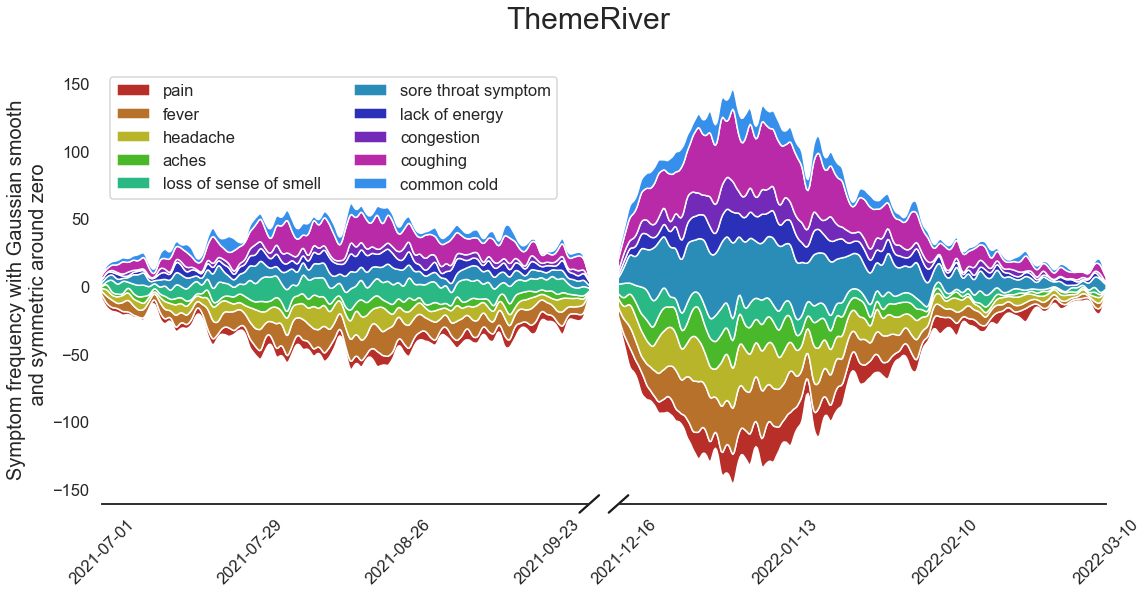

In [19]:
#only Delta and Omicron
from pandas import Timestamp
from datetime import datetime, timezone

common_symBioBERT = set(sym_select_DeltaBioBERT).intersection(set(sym_select_OmicronBioBERT))
print('common sym:',common_symBioBERT)
ThemeRiver_Del_Omi_select_wide = pd.concat([
    ThemeRiver_Delta_select_wideBioBERT[['time']+list(common_symBioBERT)],
    ThemeRiver_Omicron_select_wideBioBERT[['time']+list(common_symBioBERT)],
],axis =0)
ThemeRiver_Del_Omi_select_wide

time =  ThemeRiver_Del_Omi_select_wide.time
symptom_labels = [i for i in list(ThemeRiver_Del_Omi_select_wide.columns) if i !='time']
daySymFreq = [np.array(ThemeRiver_Del_Omi_select_wide.iloc[:,i]).astype('int') 
              for i in range(1,ThemeRiver_Del_Omi_select_wide.shape[1])]

BlueCOLORS = ["#b82f2a", "#b8712a", "#b8b52a", "#49b82a", "#2ab884","#2a8db8","#2a31b8","#732ab8","#b82aa7","3690eb"] #3690eb","#0a81f7"]

time_shrink = 5e+13
fig,(ax1,ax2) = plt.subplots(1, 2, sharey=True,  figsize=(18, 8))

shrink_time_range1 = Timestamp('2021-07-01 00:00:00').value/time_shrink
shrink_time_range2 = Timestamp('2021-10-01 00:00:00').value/time_shrink
shrink_time_range3 = Timestamp('2021-12-15 00:00:00').value/time_shrink
shrink_time_range4 =Timestamp('2022-03-10 00:00:00').value/time_shrink

grid = np.linspace(shrink_time_range1,shrink_time_range4, num=1000)
y_smoothed = [gaussian_smooth(time.apply(lambda x: x.value)/time_shrink, y, grid, sd =1) for y in daySymFreq]
ax1.stackplot(grid, y_smoothed, baseline="sym",colors=BlueCOLORS[0:len(common_symBioBERT)], labels =list(common_symBioBERT)) 
ax2.stackplot(grid, y_smoothed, baseline="sym",colors=BlueCOLORS[0:len(common_symBioBERT)], labels =list(common_symBioBERT))

t = 10
time_point = np.linspace(shrink_time_range1, shrink_time_range4, t)
time_axis_num = list(time_point*time_shrink/1e+9)
time_axis_str = [datetime.fromtimestamp(int(i), timezone.utc).strftime('%Y-%m-%d %H:%M:%S')[:10] for i in time_axis_num]

ax1.set_xticks(time_point[0: int(t/2-1)], time_axis_str[0: int(t/2-1)], rotation=45)
ax2.set_xticks(time_point[int(t/2): ], time_axis_str[int(t/2): ], rotation=45)

ax1.set_xlim(shrink_time_range1, shrink_time_range2)  
ax2.set_xlim(shrink_time_range3 , shrink_time_range4)  
ax1.set_ylabel('Symptom frequency with Gaussian smooth \n and symmetric around zero',fontsize=20)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax1.legend(loc='upper left',ncol=2)

d = .02 # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1-d,1+d),(-d,+d), **kwargs) # top-left diagonal
kwargs.update(transform=ax2.transAxes) # switch to the bottom axes
ax2.plot((-d,d),(-d,+d), **kwargs) # top-right diagonal
fig.text(0.5, 0.95, 'ThemeRiver', ha='center',fontsize=30)

plt.subplots_adjust(wspace= 0.06) #length between two subplot



common sym: {'pain', 'fever', 'headache', 'aches', 'loss of sense of smell', 'sore throat symptom', 'lack of energy', 'congestion', 'coughing', 'common cold'}


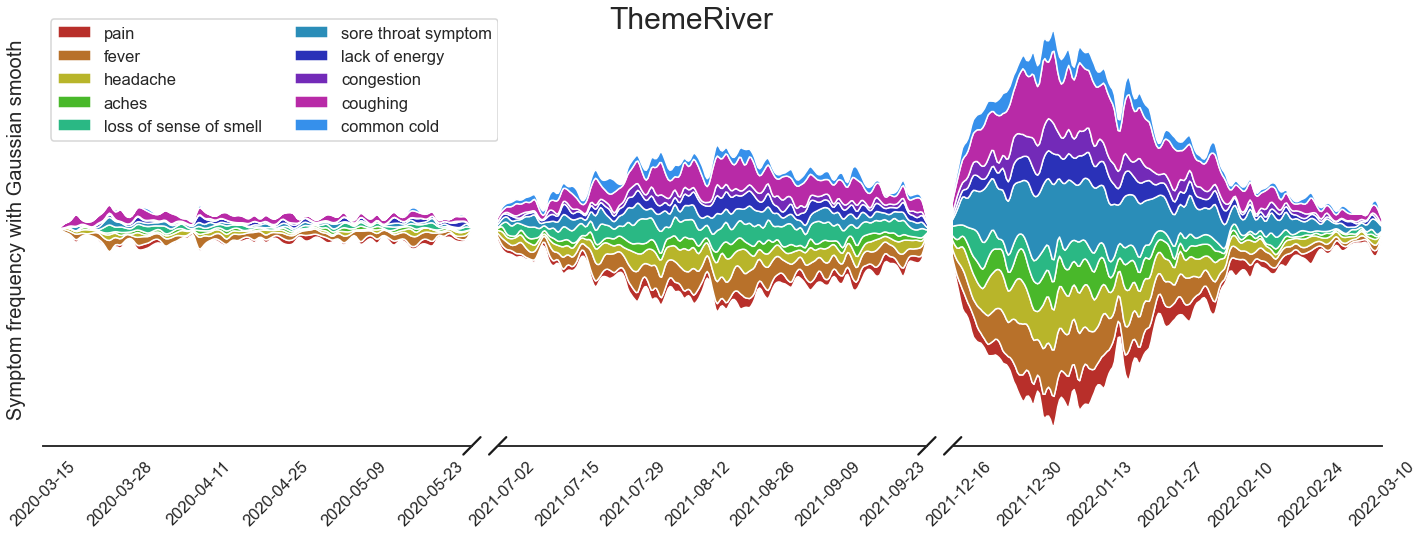

In [20]:
#Delta, Omicron, and Early stage
from pandas import Timestamp
from datetime import datetime, timezone

common_symBioBERT = set(sym_select_DeltaBioBERT).intersection(set(sym_select_OmicronBioBERT))
print('common sym:',common_symBioBERT)
ThemeRiver_Del_Omi_Ear_select_wide = pd.concat([
    ThemeRiver_Early_select_wideBioBERT[['time']+list(common_symBioBERT)],
    ThemeRiver_Delta_select_wideBioBERT[['time']+list(common_symBioBERT)],
    ThemeRiver_Omicron_select_wideBioBERT[['time']+list(common_symBioBERT)],
],axis =0)
ThemeRiver_Del_Omi_Ear_select_wide

time =  ThemeRiver_Del_Omi_Ear_select_wide.time
symptom_labels = [i for i in list(ThemeRiver_Del_Omi_Ear_select_wide.columns) if i !='time']
daySymFreq = [np.array(ThemeRiver_Del_Omi_Ear_select_wide.iloc[:,i]).astype('int') 
              for i in range(1,ThemeRiver_Del_Omi_Ear_select_wide.shape[1])]
BlueCOLORS = ["#b82f2a", "#b8712a", "#b8b52a", "#49b82a", "#2ab884","#2a8db8","#2a31b8","#732ab8","#b82aa7","3690eb"] #3690eb","#0a81f7"]

time_shrink = 5e+13
fig,(ax1,ax2,ax3) = plt.subplots(1, 3, sharey=True,  figsize=(24, 8))

shrink_time_range1 = Timestamp('2020-03-15 00:00:00').value/time_shrink
shrink_time_range2 = Timestamp('2020-05-31 00:00:00').value/time_shrink
shrink_time_range3 = Timestamp('2021-07-01 00:00:00').value/time_shrink
shrink_time_range4 = Timestamp('2021-10-01 00:00:00').value/time_shrink
shrink_time_range5 = Timestamp('2021-12-15 00:00:00').value/time_shrink
shrink_time_range6 = Timestamp('2022-03-10 00:00:00').value/time_shrink

grid = np.linspace(shrink_time_range1,shrink_time_range6, num=2000)
y_smoothed = [gaussian_smooth(time.apply(lambda x: x.value)/time_shrink, y, grid, sd =1) for y in daySymFreq]
ax1.stackplot(grid, y_smoothed, baseline="sym",colors=BlueCOLORS[0:len(common_symBioBERT)], labels =list(common_symBioBERT)) 
ax2.stackplot(grid, y_smoothed, baseline="sym",colors=BlueCOLORS[0:len(common_symBioBERT)], labels =list(common_symBioBERT))
ax3.stackplot(grid, y_smoothed, baseline="sym",colors=BlueCOLORS[0:len(common_symBioBERT)], labels =list(common_symBioBERT)) 
t = 53
time_point = np.linspace(shrink_time_range1, shrink_time_range6, t)
time_axis_num = list(time_point*time_shrink/1e+9)
time_axis_str = [datetime.fromtimestamp(int(i), timezone.utc).strftime('%Y-%m-%d %H:%M:%S')[:10] for i in time_axis_num]

ax1.set_xticks(time_point[0: int(t/3-1)], time_axis_str[0: int(t/3-1)], rotation=45)
ax2.set_xticks(time_point, time_axis_str, rotation=45)
ax3.set_xticks(time_point[int(2*t/3-1): ], time_axis_str[int(2*t/3-1): ], rotation=45)

# ax1.axes.get_yaxis().set_visible(False)
ax1.set_yticklabels([])
ax1.set_xlim(shrink_time_range1, shrink_time_range2)  
ax2.set_xlim(shrink_time_range3 , shrink_time_range4)  
ax3.set_xlim(shrink_time_range5, shrink_time_range6)  
# ax1.set_ylabel('Symptom frequency with Gaussian smooth \n and symmetric around zero',fontsize=20)
ax1.set_ylabel('Symptom frequency with Gaussian smooth',fontsize=20)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax1.legend(loc='upper left',ncol=2)

d = .02 # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1-d,1+d),(-d,+d), **kwargs) # top-left diagonal
kwargs.update(transform=ax2.transAxes) # switch to the bottom axes
ax2.plot((-d,d),(-d,+d), **kwargs) # top-right diagonal

ax2.plot((1-d,1+d),(-d,+d), **kwargs) # top-left diagonal
kwargs.update(transform=ax3.transAxes) # switch to the bottom axes
ax3.plot((-d,d),(-d,+d), **kwargs) # top-right diagonal

fig.text(0.5, 0.85, 'ThemeRiver', ha='center',fontsize=30)

plt.subplots_adjust(wspace= 0.06) #length between two subplot


# 3. Chord Diagram (Python+R)

## 3.1 Chord Diagram: Delta

In [22]:
timebased_syms_Delta_BioBERTlarge = pd.read_csv('./output_files/2021JulAugSep/timebased_syms_Delta_BioBERTlarge.csv')
DeltaSymFreqBioBERT = pd.read_csv('./output_files/2021JulAugSep/Freq_by_user_BioBERT.csv')

In [23]:
import ast
Chord_Diagram_dataDeltaBioBERT = timebased_syms_Delta_BioBERTlarge.copy()[['author','symptoms']]
Chord_Diagram_dataDeltaBioBERT['symptoms'] = Chord_Diagram_dataDeltaBioBERT['symptoms'].apply(lambda x: ast.literal_eval(x)).apply(','.join)
Chord_Diagram_dataDeltaBioBERT['AllSymForOne'] = Chord_Diagram_dataDeltaBioBERT.groupby(['author'])['symptoms'].transform(lambda x : ','.join(x))
Chord_Diagram_dataDeltaBioBERT = Chord_Diagram_dataDeltaBioBERT[['author','AllSymForOne']].drop_duplicates() 
Chord_Diagram_dataDeltaBioBERT = Chord_Diagram_dataDeltaBioBERT.reset_index(drop=True)
Chord_Diagram_dataDeltaBioBERT

,author,AllSymForOne
0,----banana----,"taste,smell,coughing,loss of sense of smell"
1,--ozzy--,taste
2,-1911-,"terrible,fever,lack of energy,coughing"
3,-FuckleberryHinn-,
4,-InTheRain,"hypochondriasis,,,"
...,...,...
6398,zsepthenne,nausea
6399,zwernjayden,
6400,zxykzxyk,"coughing,headache,lack of energy,loss of sense..."
6401,zyadox_,",loss of sense of smell,smell,"


In [170]:
<prevent running>
freq_num = 10
ten_sym_select = DeltaSymFreqBioBERT.sort_values(by=['freq'],ascending =False).iloc[:freq_num, 0]
print(ten_sym_select) 

import numpy as np
import pandas as pd
# initialize cross-table symptoms
cross_sym_matrixDeltaBioBERT = pd.DataFrame(np.zeros((len(ten_sym_select), len(ten_sym_select))))
cross_sym_matrixDeltaBioBERT = cross_sym_matrixDeltaBioBERT.set_axis(list(ten_sym_select), axis=0) 
cross_sym_matrixDeltaBioBERT = cross_sym_matrixDeltaBioBERT.set_axis(list(ten_sym_select), axis=1)
for i in range(len(Chord_Diagram_dataDeltaBioBERT['AllSymForOne'])):
    oneAuthorSym = Chord_Diagram_dataDeltaBioBERT['AllSymForOne'][i].split(',')
    oneAuthorSym = list(set([i for i in oneAuthorSym if i in set(ten_sym_select)]))
    if oneAuthorSym ==[]:
        continue
    else:
        for s1 in oneAuthorSym:
            for s2 in oneAuthorSym:
                cross_sym_matrixDeltaBioBERT[s1].loc[[s2]] += 1

np.fill_diagonal(cross_sym_matrixDeltaBioBERT.values, 0) # make diag zero

###### make lower Triangular Matrix zero ######
# col_name = cross_sym_matrixDeltaBioBERT.columns
# for i in range(cross_sym_matrixDeltaBioBERT.shape[0]):
#     for j in range(i, cross_sym_matrixDeltaBioBERT.shape[0]):
#         cross_sym_matrixDeltaBioBERT[col_name[i]].loc[[col_name[j]]] = 0
# cross_sym_matrixDeltaBioBERT
################################################

#cross_sym_matrixDeltaBioBERT.to_csv('./output_files/2021JulAugSep/cross_sym_matrixDeltaBioBERT.csv', index=True)

0                   coughing
6                      fever
3     loss of sense of smell
11                  headache
10       sore throat symptom
4             lack of energy
28                     aches
48               common cold
43                      pain
47                congestion
Name: index, dtype: object


In [24]:
cross_sym_matrixDeltaBioBERT = pd.read_csv('./output_files/2021JulAugSep/cross_sym_matrixDeltaBioBERT.csv',index_col=0)
cross_sym_matrixDeltaBioBERT

,coughing,fever,loss of sense of smell,headache,sore throat symptom,lack of energy,aches,common cold,pain,congestion
coughing,0.0,512.0,361.0,374.0,373.0,291.0,232.0,193.0,205.0,219.0
fever,512.0,0.0,367.0,384.0,355.0,287.0,311.0,179.0,198.0,172.0
loss of sense of smell,361.0,367.0,0.0,285.0,237.0,240.0,198.0,174.0,163.0,169.0
headache,374.0,384.0,285.0,0.0,305.0,282.0,233.0,147.0,191.0,172.0
sore throat symptom,373.0,355.0,237.0,305.0,0.0,208.0,173.0,163.0,141.0,184.0
lack of energy,291.0,287.0,240.0,282.0,208.0,0.0,190.0,115.0,129.0,125.0
aches,232.0,311.0,198.0,233.0,173.0,190.0,0.0,88.0,128.0,107.0
common cold,193.0,179.0,174.0,147.0,163.0,115.0,88.0,0.0,80.0,98.0
pain,205.0,198.0,163.0,191.0,141.0,129.0,128.0,80.0,0.0,81.0
congestion,219.0,172.0,169.0,172.0,184.0,125.0,107.0,98.0,81.0,0.0


## 3.2 Chord Diagram: Omicron

In [25]:
timebased_syms_Omicron_BioBERTlarge = pd.read_csv('./output_files/2021Dec2022Mar/timebased_syms_Omicron_BioBERTlarge.csv')
OmicronSymFreqBioBERT = pd.read_csv('./output_files/2021Dec2022Mar/Freq_by_user_BioBERT.csv')

In [26]:
import ast
Chord_Diagram_dataOmicronBioBERT = timebased_syms_Omicron_BioBERTlarge.copy()[['author','symptoms']]
Chord_Diagram_dataOmicronBioBERT['symptoms'] = Chord_Diagram_dataOmicronBioBERT['symptoms'].apply(lambda x: ast.literal_eval(x)).apply(','.join)
Chord_Diagram_dataOmicronBioBERT['AllSymForOne'] = Chord_Diagram_dataOmicronBioBERT.groupby(['author'])['symptoms'].transform(lambda x : ','.join(x))
Chord_Diagram_dataOmicronBioBERT = Chord_Diagram_dataOmicronBioBERT[['author','AllSymForOne']].drop_duplicates() 
Chord_Diagram_dataOmicronBioBERT = Chord_Diagram_dataOmicronBioBERT.reset_index(drop=True)
Chord_Diagram_dataOmicronBioBERT

,author,AllSymForOne
0,-01101101-,blood
1,-1911-,"smell,smell,smell,body,"
2,-Boy-Mom,"nose,stops breathing"
3,-CryptoSardine-,"sweating symptom,aches,fever,trouble,asleep,sl..."
4,-HouseTargaryen-,"pain,pain"
...,...,...
9148,zuzzthefuzz,"otalgia,terrible,pressure - physical agent,sor..."
9149,zyflin,
9150,zz-de,
9151,zzDeathGodzz,",sore throat symptom,coughing,sore throat symptom"


In [ ]:
<prevent running>
freq_num = 10
ten_sym_select = OmicronSymFreqBioBERT.sort_values(by=['freq'],ascending =False).iloc[:freq_num, 0]
print(ten_sym_select) 

import numpy as np
import pandas as pd
# initialize cross-table symptoms
cross_sym_matrixOmicronBioBERT  = pd.DataFrame(np.zeros((len(ten_sym_select), len(ten_sym_select))))
cross_sym_matrixOmicronBioBERT = cross_sym_matrixOmicronBioBERT.set_axis(list(ten_sym_select), axis=0) 
cross_sym_matrixOmicronBioBERT = cross_sym_matrixOmicronBioBERT.set_axis(list(ten_sym_select), axis=1)
for i in range(len(Chord_Diagram_dataOmicronBioBERT['AllSymForOne'])):
    oneAuthorSym = Chord_Diagram_dataOmicronBioBERT['AllSymForOne'][i].split(',')
    oneAuthorSym = list(set([i for i in oneAuthorSym if i in set(ten_sym_select)]))
    if oneAuthorSym ==[]:
        continue
    else:
        for s1 in oneAuthorSym:
            for s2 in oneAuthorSym:
                cross_sym_matrixOmicronBioBERT[s1].loc[[s2]] += 1

np.fill_diagonal(cross_sym_matrixOmicronBioBERT.values, 0) # make diag zero

###### make lower Triangular Matrix zero ######
# col_name = cross_sym_matrixOmicronBioBERT.columns
# for i in range(cross_sym_matrixOmicronBioBERT.shape[0]):
#     for j in range(i, cross_sym_matrixOmicronBioBERT.shape[0]):
#         cross_sym_matrixOmicronBioBERT[col_name[i]].loc[[col_name[j]]] = 0
# cross_sym_matrixOmicronBioBERT
################################################

# cross_sym_matrixOmicronBioBERT.to_csv('./output_files/2021Dec2022Mar/cross_sym_matrixOmicronBioBERT.csv', index=True)

In [27]:
cross_sym_matrixOmicronBioBERT = pd.read_csv('./output_files/2021Dec2022Mar/cross_sym_matrixOmicronBioBERT.csv',index_col=0)
cross_sym_matrixOmicronBioBERT

,sore throat symptom,coughing,fever,headache,pain,lack of energy,aches,congestion,loss of sense of smell,common cold
sore throat symptom,0.0,964.0,690.0,675.0,391.0,497.0,460.0,446.0,247.0,311.0
coughing,964.0,0.0,724.0,645.0,406.0,488.0,476.0,491.0,298.0,328.0
fever,690.0,724.0,0.0,580.0,316.0,399.0,533.0,327.0,228.0,249.0
headache,675.0,645.0,580.0,0.0,338.0,412.0,457.0,326.0,208.0,223.0
pain,391.0,406.0,316.0,338.0,0.0,214.0,267.0,185.0,134.0,156.0
lack of energy,497.0,488.0,399.0,412.0,214.0,0.0,324.0,271.0,166.0,168.0
aches,460.0,476.0,533.0,457.0,267.0,324.0,0.0,259.0,168.0,172.0
congestion,446.0,491.0,327.0,326.0,185.0,271.0,259.0,0.0,162.0,173.0
loss of sense of smell,247.0,298.0,228.0,208.0,134.0,166.0,168.0,162.0,0.0,126.0
common cold,311.0,328.0,249.0,223.0,156.0,168.0,172.0,173.0,126.0,0.0


In [29]:
######### Then go to the Symptom_Rplot to check results #########

# 4. sankey diagram (Python+R)

In [ ]:
ULMS_mapping_sym_BioBERTlarge_Delta = np.load('./output_files/ULMS_mapping_sym_BioBERTlarge.npy',
                                        allow_pickle='TRUE').item()['ULMS_mapping_sym_BioBERTlarge']
All_int_sym_BioBERTlarge_Delta = pd.read_csv('./output_files/2021JulAugSep/flatten_gathered_sym_per_body_BioBERTlarge.csv',
                                              header=None)

ULMS_mapping_sym_BioBERTlarge_Omicron = np.load('./output_files/ULMS_mapping_sym_BioBERTlarge.npy',
                                        allow_pickle='TRUE').item()['ULMS_mapping_sym_BioBERTlarge']
All_int_sym_BioBERTlarge_Omicron = pd.read_csv('./output_files/2021Dec2022Mar/flatten_gathered_sym_per_body_BioBERTlarge.csv',
                                              header=None)

Together_Keywords = np.load('./output_files/Word_Corpus_result_epoch5_together.npy',allow_pickle='TRUE').item()['Keywords']


## 4.1 sankey diagram: Delta

In [28]:
from collections import Counter 
import pandas as pd
Int_ans_count_dic_Delta = Counter(All_int_sym_BioBERTlarge_Delta[0].to_list())

# create wide table with columns: key_word, symptom, UMLS_name, symptom_count
sankey_Delta_df = pd.DataFrame(columns = ['key_word', 'symptom', 'UMLS_name', 'symptom_count'])
for key_word in list(Together_Keywords):
    for count_sym in list(Int_ans_count_dic_Delta.keys()):
        if key_word in count_sym.split():
            for cluster in ULMS_mapping_sym_BioBERTlarge_Delta.values():
                if count_sym in cluster:
                    rowdata = {'key_word':key_word, 'symptom':count_sym, 'UMLS_name':cluster[-1][0], 
                               'symptom_count':Int_ans_count_dic_Delta[count_sym]}
                    sankey_Delta_df = sankey_Delta_df.append(rowdata, ignore_index = True)
                    break
        else:
            continue
sankey_Delta_df           

,key_word,symptom,UMLS_name,symptom_count
0,vomit,vomit,vomitus,11
1,earache,earache,otalgia,5
2,sinuses,sinuses,sinuses,88
3,sinuses,burning sinuses,sinuses,3
4,sinuses,congested sinuses,sinuses,4
...,...,...,...,...
1025,flu,cold or flu,common cold,9
1026,flu,flu like,influenza,2
1027,flu,or flu,influenza,1
1028,flu,weird flu,weird,1


In [29]:
#select rows based on threshold
sym_select = ['fever','coughing','lack of energy','sore throat symptom','aches']
#['coughing','fever', 'loss of sense of smell', 'headache', 'lack of energy', 'sore throat symptom', 'aches', 'common cold','pain','congestion']
symptom_count_threshold = 20
sankey_Delta_df1 = sankey_Delta_df.loc[sankey_Delta_df['UMLS_name'].isin(list(sym_select))]
sankey_Delta_df1 = sankey_Delta_df1[sankey_Delta_df1['symptom_count']>symptom_count_threshold]
sankey_Delta_df1 = sankey_Delta_df1.reset_index(drop=True)

#make long table (key_word, symptom, symptom_count)
sankey_Delta_df_long1 = pd.DataFrame(columns = ['from', 'to', 'count'])
sankey_Delta_df_long1['from'] = sankey_Delta_df1['key_word'].apply(lambda x: "keyword: "+x)
sankey_Delta_df_long1['to'] = sankey_Delta_df1['symptom']
sankey_Delta_df_long1['count'] = sankey_Delta_df1['symptom_count']

#make long table (symptom, UMLS_name, symptom_count)
sankey_Delta_df_long2 = pd.DataFrame(columns = ['from', 'to', 'count'])
sankey_Delta_df_long2['from'] = sankey_Delta_df1['symptom']
sankey_Delta_df_long2['to'] = sankey_Delta_df1['UMLS_name'].apply(lambda x: "UMLS: "+x)
sankey_Delta_df_long2['count'] = sankey_Delta_df1['symptom_count']

#whole long table (combine the two long tables)
sankey_Delta_df_long = pd.concat([sankey_Delta_df_long1,sankey_Delta_df_long2],0)
#sankey_Delta_df_long.to_csv('./output_files/2021JulAugSep/sankey_Delta_df_long.csv', index=True)

In [30]:
sankey_Delta_df_long = pd.read_csv('./output_files/2021JulAugSep/sankey_Delta_df_long.csv',index_col=0)
sankey_Delta_df_long.head()

,from,to,count
0,keyword: muscle,muscle aches,65
1,keyword: fever,fever,1184
2,keyword: fever,slight fever,52
3,keyword: fever,low grade fever,82
4,keyword: fever,low fever,42


In [39]:
######### Then go to the Symptom_Rplot to check results #########

## 4.2 sankey diagram: Omicron

In [31]:
from collections import Counter 
import pandas as pd
Int_ans_count_dic_Omicron = Counter(All_int_sym_BioBERTlarge_Omicron[0].to_list())

# create wide table with columns: key_word, symptom, UMLS_name, symptom_count
sankey_Omicron_df = pd.DataFrame(columns = ['key_word', 'symptom', 'UMLS_name', 'symptom_count'])
for key_word in list(Together_Keywords):
    for count_sym in list(Int_ans_count_dic_Omicron.keys()):
        if key_word in count_sym.split():
            for cluster in ULMS_mapping_sym_BioBERTlarge_Omicron.values():
                if count_sym in cluster:
                    rowdata = {'key_word':key_word, 'symptom':count_sym, 'UMLS_name':cluster[-1][0], 
                               'symptom_count':Int_ans_count_dic_Omicron[count_sym]}
                    sankey_Omicron_df = sankey_Omicron_df.append(rowdata, ignore_index = True)
                    break
        else:
            continue
sankey_Omicron_df           

,key_word,symptom,UMLS_name,symptom_count
0,vomit,vomit,vomitus,20
1,earache,earache,otalgia,14
2,sinuses,sinuses,sinuses,120
3,sinuses,congested sinuses,sinuses,3
4,sinuses,sinuses feel,sinuses,2
...,...,...,...,...
1186,flu,cold or flu,common cold,11
1187,flu,flu like,influenza,7
1188,flu,bad flu,terrible,14
1189,flu,or flu,influenza,1


In [32]:
#select rows based on threshold
sym_select = ['fever','coughing','lack of energy','sore throat symptom','aches']
#['coughing','fever', 'loss of sense of smell', 'headache', 'lack of energy', 'sore throat symptom', 'aches', 'common cold','pain','congestion']
symptom_count_threshold = 20
sankey_Omicron_df1 = sankey_Omicron_df.loc[sankey_Omicron_df['UMLS_name'].isin(list(sym_select))]
sankey_Omicron_df1 = sankey_Omicron_df1[sankey_Omicron_df1['symptom_count']>symptom_count_threshold]
sankey_Omicron_df1 = sankey_Omicron_df1.reset_index(drop=True)

#make long table (key_word, symptom, symptom_count)
sankey_Omicron_df_long1 = pd.DataFrame(columns = ['from', 'to', 'count'])
sankey_Omicron_df_long1['from'] = sankey_Omicron_df1['key_word'].apply(lambda x: "keyword: "+x)
sankey_Omicron_df_long1['to'] = sankey_Omicron_df1['symptom']
sankey_Omicron_df_long1['count'] = sankey_Omicron_df1['symptom_count']

#make long table (symptom, UMLS_name, symptom_count)
sankey_Omicron_df_long2 = pd.DataFrame(columns = ['from', 'to', 'count'])
sankey_Omicron_df_long2['from'] = sankey_Omicron_df1['symptom']
sankey_Omicron_df_long2['to'] = sankey_Omicron_df1['UMLS_name'].apply(lambda x: "UMLS: "+x)
sankey_Omicron_df_long2['count'] = sankey_Omicron_df1['symptom_count']

#whole long table (combine the two long tables)
sankey_Omicron_df_long = pd.concat([sankey_Omicron_df_long1,sankey_Omicron_df_long2],0)
#sankey_Omicron_df_long.to_csv('./output_files/2021Dec2022Mar/sankey_Omicron_df_long.csv', index=True)


In [33]:
sankey_Omicron_df_long = pd.read_csv('./output_files/2021Dec2022Mar/sankey_Omicron_df_long.csv',index_col=0)
sankey_Omicron_df_long

,from,to,count
0,keyword: muscle,muscle aches,133
1,keyword: fever,mild fever,63
2,keyword: fever,fever,1557
3,keyword: fever,low grade fever,153
4,keyword: fever,low fever,74
...,...,...,...
40,sore throat,UMLS: sore throat symptom,1623
41,slight sore throat,UMLS: sore throat symptom,42
42,sore throats,UMLS: sore throat symptom,33
43,no sore throat,UMLS: sore throat symptom,30


## Table: COVID-19 symptoms extraction

In [29]:
DeltaSymFreqBioBERT = pd.read_csv('./output_files/2021JulAugSep/Freq_by_user_BioBERT.csv').sort_values(by=['freq'],ascending=False)
DeltaSymFreqBERT = pd.read_csv('./output_files/2021JulAugSep/Freq_by_user_BERT.csv').sort_values(by=['freq'],ascending=False)
OmicronSymFreqBioBERT = pd.read_csv('./output_files/2021Dec2022Mar/Freq_by_user_BioBERT.csv').sort_values(by=['freq'],ascending=False)
OmicronSymFreqBERT = pd.read_csv('./output_files/2021Dec2022Mar/Freq_by_user_BERT.csv').sort_values(by=['freq'],ascending=False)
EarlyStageSymFreqBioBERT = pd.read_csv('./output_files/2020MarAprMay/Freq_by_user_BioBERT.csv').sort_values(by=['freq'],ascending=False)
EarlyStageSymFreqBERT = pd.read_csv('./output_files/2020MarAprMay/Freq_by_user_BERT.csv').sort_values(by=['freq'],ascending=False)



In [30]:
DeltaSymFreqBioBERT.columns = ['Symptom', 'count_freq_DeltaBioBERT', 'freq_DeltaBioBERT']
DeltaSymFreqBERT.columns = ['Symptom', 'count_freq_DeltaBERT', 'freq_DeltaBERT']
OmicronSymFreqBioBERT.columns = ['Symptom', 'count_freq_OmicronBioBERT', 'freq_OmicronBioBERT']
OmicronSymFreqBERT.columns = ['Symptom', 'count_freq_OmicronBERT', 'freq_OmicronBERT']
EarlyStageSymFreqBioBERT.columns = ['Symptom', 'count_freq_EarlyBioBERT', 'freq_EarlyBioBERT']
EarlyStageSymFreqBERT.columns = ['Symptom', 'count_freq_EarlyBERT', 'freq_EarlyBERT']


In [31]:
#change data format 
SymFreqAll = EarlyStageSymFreqBioBERT.merge(EarlyStageSymFreqBERT,how ='outer').merge(DeltaSymFreqBioBERT,how ='outer').merge(DeltaSymFreqBERT,how ='outer').merge(OmicronSymFreqBioBERT,how ='outer').merge(OmicronSymFreqBERT,how ='outer')
SymFreqAll = SymFreqAll.dropna(how='any')
SymFreqAll.sort_values(by=['freq_OmicronBioBERT'],ascending=False)

SymFreqAll.count_freq_EarlyBioBERT = SymFreqAll.count_freq_EarlyBioBERT.astype('int64')
SymFreqAll.freq_EarlyBioBERT = SymFreqAll['freq_EarlyBioBERT'].map(lambda x: '{:,.1%}'.format(x))
SymFreqAll.count_freq_EarlyBERT = SymFreqAll.count_freq_EarlyBERT.astype('int64')
SymFreqAll.freq_EarlyBERT = SymFreqAll['freq_EarlyBERT'].map(lambda x: '{:,.1%}'.format(x))

SymFreqAll.count_freq_DeltaBioBERT = SymFreqAll.count_freq_DeltaBioBERT.astype('int64')
SymFreqAll.freq_DeltaBioBERT = SymFreqAll['freq_DeltaBioBERT'].map(lambda x: '{:,.1%}'.format(x))
SymFreqAll.count_freq_DeltaBERT = SymFreqAll.count_freq_DeltaBERT.astype('int64')
SymFreqAll.freq_DeltaBERT = SymFreqAll['freq_DeltaBERT'].map(lambda x: '{:,.1%}'.format(x))

SymFreqAll.count_freq_OmicronBioBERT = SymFreqAll.count_freq_OmicronBioBERT.astype('int64')
SymFreqAll.freq_OmicronBioBERT = SymFreqAll['freq_OmicronBioBERT'].map(lambda x: '{:,.1%}'.format(x))
SymFreqAll.count_freq_OmicronBERT = SymFreqAll.count_freq_OmicronBERT.astype('int64')
SymFreqAll.freq_OmicronBERT = SymFreqAll['freq_OmicronBERT'].map(lambda x: '{:,.1%}'.format(x))



In [32]:
ResultTable = pd.DataFrame()
ResultTable['Symptom'] = SymFreqAll['Symptom']
ResultTable['Our study (BioBERT) on Covid early stage']=SymFreqAll['count_freq_EarlyBioBERT'].astype(str) +" ("+ SymFreqAll["freq_EarlyBioBERT"]+")"
ResultTable['Our study (BERT) on Covid early stage']=SymFreqAll['count_freq_EarlyBERT'].astype(str) +" ("+ SymFreqAll["freq_EarlyBERT"]+")"
ResultTable['Our study (BioBERT) on Delta period']=SymFreqAll['count_freq_DeltaBioBERT'].astype(str) +" ("+ SymFreqAll["freq_DeltaBioBERT"]+")"
ResultTable['Our study (BERT) on Delta period']=SymFreqAll['count_freq_DeltaBERT'].astype(str) +" ("+ SymFreqAll["freq_DeltaBERT"]+")"
ResultTable['Our study (BioBERT) on Omicron period']=SymFreqAll['count_freq_OmicronBioBERT'].astype(str) +" ("+ SymFreqAll["freq_OmicronBioBERT"]+")"
ResultTable['Our study (BERT) on Omicron period']=SymFreqAll['count_freq_OmicronBERT'].astype(str) +" ("+ SymFreqAll["freq_OmicronBERT"]+")"

NumAuthorsReporting = pd.DataFrame({'Symptom':' ', 
                                    'Our study (BioBERT) on Covid early stage':'294', 
                                    'Our study (BERT) on Covid early stage':'288',
                                    'Our study (BioBERT) on Delta period':'5110',
                                    'Our study (BERT) on Delta period':'4589',
                                    'Our study (BioBERT) on Omicron period':'7573',
                                    'Our study (BERT) on Omicron period':'7080'}, index =['Number of authors with symptom extracted'])
ResultTable = pd.concat([NumAuthorsReporting, ResultTable])

Date = pd.DataFrame({'Symptom':' ', 
                    'Our study (BioBERT) on Covid early stage':'March 14, 2020 - May 31, 2020',  
                    'Our study (BERT) on Covid early stage':'March 14, 2020 - May 31, 2020',
                    'Our study (BioBERT) on Delta period':'July 01, 2021 - Oct 01, 2021',
                    'Our study (BERT) on Delta period':'July 01, 2021 - Oct 01, 2021',
                    'Our study (BioBERT) on Omicron period':'Dec 15, 2021 - Mar 10, 2022',
                    'Our study (BERT) on Omicron period':'Dec 15, 2021 - Mar 10, 2022'}, index =['Date'])
ResultTable = pd.concat([Date, ResultTable])#.reset_index(drop = True)

Sarker_work = ['']*ResultTable.shape[0]
ResultTable['Sarker et al. study on Twitter'] = Sarker_work
ResultTable.loc['Date', 'Sarker et al. study on Twitter'] = 'Feb 01, 2020 - Apr 14, 2020'
ResultTable.loc['Number of authors with symptom extracted', 'Sarker et al. study on Twitter'] = '169'
ResultTable.loc[ResultTable['Symptom'] == 'coughing', 'Sarker et al. study on Twitter'] = '99 (58.6%)'
ResultTable.loc[ResultTable['Symptom'] == 'fever', 'Sarker et al. study on Twitter'] = '113 (66.9%)'
ResultTable.loc[ResultTable['Symptom'] == 'dyspnea', 'Sarker et al. study on Twitter'] = '62 (36.7%)'
ResultTable.loc[ResultTable['Symptom'] == 'headache', 'Sarker et al. study on Twitter'] = '64 (37.9%)'
ResultTable.loc[ResultTable['Symptom'] == 'pain', 'Sarker et al. study on Twitter'] = '73 (43.2%) *'
ResultTable.loc[ResultTable['Symptom'] == 'aches', 'Sarker et al. study on Twitter'] = '73 (43.2%) *'
ResultTable.loc[ResultTable['Symptom'] == 'lack of energy', 'Sarker et al. study on Twitter'] = '72 (42.6%) *'
ResultTable.loc[ResultTable['Symptom'] == 'loss of sense of smell', 'Sarker et al. study on Twitter'] = '49 (29.0%) *'
ResultTable.loc[ResultTable['Symptom'] == 'chest pain', 'Sarker et al. study on Twitter'] = '39 (23.1%)'
ResultTable.loc[ResultTable['Symptom'] == 'sore throat symptom', 'Sarker et al. study on Twitter'] = '41 (24.3%) *'
ResultTable.loc[ResultTable['Symptom'] == 'diarrhea symptom', 'Sarker et al. study on Twitter'] = '15 (8.9%)'
ResultTable.loc[ResultTable['Symptom'] == 'nausea', 'Sarker et al. study on Twitter'] = '19 (11.2%)'
ResultTable.loc[ResultTable['Symptom'] == 'dizziness', 'Sarker et al. study on Twitter'] = '15 (8.9%)'
ResultTable.loc[ResultTable['Symptom'] == 'diarrhea symptom', 'Sarker et al. study on Twitter'] = '15 (8.9%)'
ResultTable.loc[ResultTable['Symptom'] == 'chill', 'Sarker et al. study on Twitter'] = '43 (25.4%)'



# Sarker_work = ['']*ResultTable.shape[0]
# ResultTable['Sarker et al. study on Reddit'] = Sarker_work
# ResultTable.loc['Date', 'Sarker et al. study on Reddit'] = 'Jul 25, 2020 - June 06, 2021'
# ResultTable.loc['Number of authors with symptom extracted', 'Sarker et al. study on Reddit'] = '1744'
# ResultTable.loc[ResultTable['Symptom'] == 'coughing', 'Sarker et al. study on Reddit'] = '277 (15.9%)'
# ResultTable.loc[ResultTable['Symptom'] == 'fever', 'Sarker et al. study on Reddit'] = '427 (24.5%) *'
# ResultTable.loc[ResultTable['Symptom'] == 'dyspnea', 'Sarker et al. study on Reddit'] = '504 (28.9%)'
# ResultTable.loc[ResultTable['Symptom'] == 'headache', 'Sarker et al. study on Reddit'] = '391 (22.4%)'
# ResultTable.loc[ResultTable['Symptom'] == 'pain', 'Sarker et al. study on Reddit'] = '844 (48.4%) *'
# ResultTable.loc[ResultTable['Symptom'] == 'aches', 'Sarker et al. study on Reddit'] = '844 (48.4%) *'
# ResultTable.loc[ResultTable['Symptom'] == 'lack of energy', 'Sarker et al. study on Reddit'] = '893 (51.2%) *'
# ResultTable.loc[ResultTable['Symptom'] == 'loss of sense of smell', 'Sarker et al. study on Reddit'] = '169 (9.7%)'
# ResultTable.loc[ResultTable['Symptom'] == 'chest pain', 'Sarker et al. study on Reddit'] = '320 (18.3%)'
# ResultTable.loc[ResultTable['Symptom'] == 'sore throat symptom', 'Sarker et al. study on Reddit'] = ''
# ResultTable.loc[ResultTable['Symptom'] == 'diarrhea symptom', 'Sarker et al. study on Reddit'] = '231 (13.2%) *'
# ResultTable.loc[ResultTable['Symptom'] == 'nausea', 'Sarker et al. study on Reddit'] = '124 (7.1%)'
# ResultTable.loc[ResultTable['Symptom'] == 'palpitations', 'Sarker et al. study on Reddit'] = '302 (17.3%)'
# ResultTable.loc[ResultTable['Symptom'] == 'dizziness', 'Sarker et al. study on Reddit'] = '285 (16.3%)'
# ResultTable.loc[ResultTable['Symptom'] == 'chill', 'Sarker et al. study on Reddit'] = '196 (11.2%)' 
# ResultTable.loc[ResultTable['Symptom'] == 'insomnia', 'Sarker et al. study on Reddit'] = '169 (9.7%) *' 

#print(ResultTable[0:24].to_latex(index=False))  
ResultTable = ResultTable[0:24]
ResultTable = ResultTable[~ResultTable['Symptom'].isin(['virus','sleep','blood'])]
ResultTable


,Symptom,Our study (BioBERT) on Covid early stage,Our study (BERT) on Covid early stage,Our study (BioBERT) on Delta period,Our study (BERT) on Delta period,Our study (BioBERT) on Omicron period,Our study (BERT) on Omicron period,Sarker et al. study on Twitter
Date,,"March 14, 2020 - May 31, 2020","March 14, 2020 - May 31, 2020","July 01, 2021 - Oct 01, 2021","July 01, 2021 - Oct 01, 2021","Dec 15, 2021 - Mar 10, 2022","Dec 15, 2021 - Mar 10, 2022","Feb 01, 2020 - Apr 14, 2020"
Number of authors with symptom extracted,,294,288,5110,4589,7573,7080,169
0,coughing,166 (56.5%),154 (53.5%),1225 (24.0%),1092 (23.8%),2110 (27.9%),1886 (26.6%),99 (58.6%)
1,fever,161 (54.8%),152 (52.8%),1183 (23.2%),979 (21.3%),1630 (21.5%),1379 (19.5%),113 (66.9%)
2,loss of sense of smell,119 (40.5%),115 (39.9%),1086 (21.3%),994 (21.7%),875 (11.6%),856 (12.1%),49 (29.0%) *
3,headache,118 (40.1%),112 (38.9%),927 (18.1%),863 (18.8%),1491 (19.7%),1406 (19.9%),64 (37.9%)
4,sore throat symptom,117 (39.8%),108 (37.5%),868 (17.0%),827 (18.0%),2258 (29.8%),2164 (30.6%),41 (24.3%) *
5,dyspnea,106 (36.1%),98 (34.0%),230 (4.5%),209 (4.6%),292 (3.9%),271 (3.8%),62 (36.7%)
6,pain,105 (35.7%),100 (34.7%),526 (10.3%),502 (10.9%),1085 (14.3%),1044 (14.7%),73 (43.2%) *
7,lack of energy,104 (35.4%),92 (31.9%),703 (13.8%),633 (13.8%),1069 (14.1%),991 (14.0%),72 (42.6%) *


# 1: Chi-square independent Test with Twitter

### chi-square test

Null hypothesis: Symptoms and Model are independent.

In [33]:
from scipy.stats import chi2_contingency
from scipy.stats import combine_pvalues

sym_list = ['coughing','fever','loss of sense of smell','headache','sore throat symptom','dyspnea','pain',
            'lack of energy','aches','chill','chest pain','diarrhea symptom','nausea','dizziness']
pvalue_list = []
for sym in sym_list:
    Our=int(ResultTable[ResultTable['Symptom']==sym]['Our study (BioBERT) on Covid early stage'].item().split()[0])
    Sarker=int(ResultTable[ResultTable['Symptom']==sym]['Sarker et al. study on Twitter'].item().split()[0])
    df = pd.DataFrame({'Model': ['Our'] *294 + ['Sarker et al.'] * 169,
                       'Symptom': [sym]*Our+['non-'+sym]*(294-Our)+[sym]*Sarker+['non-'+sym]*(169-Sarker)}) 
    crosstab= pd.crosstab(df['Model'], df['Symptom']) 
    print(crosstab)
    c, p, dof, expected = chi2_contingency(crosstab,correction=False)
    print(sym)
    print('Chi-square p-value:', round(p,3))
    print(expected)
    print('\n')
#     pvalue_list.append(p)
# combine_pvalues(pvalue_list, method='fisher', weights=None)

Symptom        coughing  non-coughing
Model                                
Our                 166           128
Sarker et al.        99            70
coughing
Chi-square p-value: 0.658
[[168.27213823 125.72786177]
 [ 96.72786177  72.27213823]]


Symptom        fever  non-fever
Model                          
Our              161        133
Sarker et al.    113         56
fever
Chi-square p-value: 0.011
[[173.98704104 120.01295896]
 [100.01295896  68.98704104]]


Symptom        loss of sense of smell  non-loss of sense of smell
Model                                                            
Our                               119                         175
Sarker et al.                      49                         120
loss of sense of smell
Chi-square p-value: 0.013
[[106.67818575 187.32181425]
 [ 61.32181425 107.67818575]]


Symptom        headache  non-headache
Model                                
Our                 118           176
Sarker et al.        64           105
heada

# 2 (BioBERT). Synchronization test between the series of the number of COVID-19 cases and the series of the number of cases we extracted

### Our cases with symptoms

In [34]:
timebased_Early_cases = timebased_syms_Early_BioBERTlarge.copy()[['author']]
timebased_Early_cases['day'] = [i.split()[0] for i in timebased_syms_Early_BioBERTlarge['time']]
timebased_Early_cases = timebased_Early_cases.drop_duplicates() #remove duplicated author for a single day
timebased_Early_cases = timebased_Early_cases['day'].value_counts().rename('Our_cases').to_frame().sort_index()
timebased_Early_cases.reset_index(inplace=True)
timebased_Early_cases = timebased_Early_cases.rename(columns = {'index':'Date'})

timebased_Delta_cases = timebased_syms_Delta_BioBERTlarge.copy()[['author']]
timebased_Delta_cases['day'] = [i.split()[0] for i in timebased_syms_Delta_BioBERTlarge['time']]
timebased_Delta_cases = timebased_Delta_cases.drop_duplicates() #remove duplicated author for a single day
timebased_Delta_cases = timebased_Delta_cases['day'].value_counts().rename('Our_cases').to_frame().sort_index()
timebased_Delta_cases.reset_index(inplace=True)
timebased_Delta_cases = timebased_Delta_cases.rename(columns = {'index':'Date'})

timebased_Omicron_cases = timebased_syms_Omicron_BioBERTlarge.copy()[['author']]
timebased_Omicron_cases['day'] = [i.split()[0] for i in timebased_syms_Omicron_BioBERTlarge['time']]
timebased_Omicron_cases = timebased_Omicron_cases.drop_duplicates() #remove duplicated author for a single day
timebased_Omicron_cases = timebased_Omicron_cases['day'].value_counts().rename('Our_cases').to_frame().sort_index()
timebased_Omicron_cases.reset_index(inplace=True)
timebased_Omicron_cases = timebased_Omicron_cases.rename(columns = {'index':'Date'})

# Save: 
# Our_cases_data_BioBERT=pd.concat([timebased_Early_cases,timebased_Delta_cases,timebased_Omicron_cases]).reset_index()
# Our_cases_data_BioBERT.to_csv('./output_files/Our_cases_data_BioBERT.csv', index=False)


### Our cases (classified as positive)

In [36]:
Early_cases_cls = pd.read_csv('./output_files/positive_data.csv')[['author','date']]
Early_cases_cls['date'] =  Early_cases_cls['date'].apply(lambda x: x.split()[0])
Early_cases_cls = Early_cases_cls.drop_duplicates().sort_values(by='date', ascending=True)
Early_cases_cls['cls_count'] = Early_cases_cls.groupby(['date'])['author'].transform('count')
Early_cases_cls = Early_cases_cls[['date','cls_count']].drop_duplicates()

Delta_cases_cls = pd.read_csv('./output_files/2021JulAugSep/positive_data2021JulAugSep.csv')[['author','created_utc']]
Delta_cases_cls['date'] =  Delta_cases_cls['created_utc'].apply(lambda x: x.split()[0])
Delta_cases_cls = Delta_cases_cls[['author','date']]
Delta_cases_cls = Delta_cases_cls.drop_duplicates().sort_values(by='date', ascending=True)
Delta_cases_cls['cls_count'] = Delta_cases_cls.groupby(['date'])['author'].transform('count')
Delta_cases_cls = Delta_cases_cls[['date','cls_count']].drop_duplicates()


Omicron_cases_cls = pd.read_csv('./output_files/2021Dec2022Mar/positive_data2021Dec2022Mar.csv')[['author','created_utc']]
Omicron_cases_cls['date'] =  Omicron_cases_cls['created_utc'].apply(lambda x: x.split()[0])
Omicron_cases_cls = Omicron_cases_cls[['author','date']]
Omicron_cases_cls = Omicron_cases_cls.drop_duplicates().sort_values(by='date', ascending=True)
Omicron_cases_cls['cls_count'] = Omicron_cases_cls.groupby(['date'])['author'].transform('count')
Omicron_cases_cls = Omicron_cases_cls[['date','cls_count']].drop_duplicates() 


# Save: 
# Our_cases_cls_data_BioBERT=pd.concat([Early_cases_cls, 
#                                       Delta_cases_cls,
#                                       Omicron_cases_cls]).reset_index()
# Our_cases_cls_data_BioBERT.to_csv('./output_files/Our_cases_cls_data_BioBERT.csv', index=False)


### Official cases

In [37]:
Official_daily_caseData = pd.read_csv('./data/data_table_for_daily_case_trends__the_united_states.csv',
                                      skiprows = 1,header = 1)
Official_daily_caseData['Date'] = pd.to_datetime(Official_daily_caseData['Date'], format="%b %d %Y")
Official_daily_caseData['Date'] = Official_daily_caseData['Date'].dt.strftime('%Y-%m-%d')
Official_daily_caseData = Official_daily_caseData[['Date','New Cases','7-Day Moving Avg']]
Official_daily_caseData

,Date,New Cases,7-Day Moving Avg
0,2022-08-04,128546,114830
1,2022-08-03,146356,117320
2,2022-08-02,162985,119352
3,2022-08-01,125633,120037
4,2022-07-31,36946,118361
...,...,...,...
920,2020-01-27,0,1
921,2020-01-26,1,1
922,2020-01-25,0,1
923,2020-01-24,1,1


In [38]:
#merge official cases and our cases
case_three_sources_Early=pd.merge(timebased_Early_cases, Official_daily_caseData,
                                how="inner",left_on='Date',right_on='Date')
case_three_sources_Early=pd.merge(case_three_sources_Early, Early_cases_cls,
                                how="inner",left_on='Date',right_on='date')
case_three_sources_Early['7avg-Our_cases'] = case_three_sources_Early['Our_cases'].rolling(7).mean()
case_three_sources_Early['7avg-cls_count'] = case_three_sources_Early['cls_count'].rolling(7).mean()


case_three_sources_Delta=pd.merge(timebased_Delta_cases, Official_daily_caseData,
                                how="inner",left_on='Date',right_on='Date')
case_three_sources_Delta=pd.merge(case_three_sources_Delta, Delta_cases_cls,
                                how="inner",left_on='Date',right_on='date')
case_three_sources_Delta['7avg-Our_cases'] = case_three_sources_Delta['Our_cases'].rolling(7).mean()
case_three_sources_Delta['7avg-cls_count'] = case_three_sources_Delta['cls_count'].rolling(7).mean()


case_three_sources_Omicron=pd.merge(timebased_Omicron_cases, Official_daily_caseData,
                                how="inner",left_on='Date',right_on='Date')
case_three_sources_Omicron=pd.merge(case_three_sources_Omicron, Omicron_cases_cls,
                                how="inner",left_on='Date',right_on='date')
case_three_sources_Omicron['7avg-Our_cases'] = case_three_sources_Omicron['Our_cases'].rolling(7).mean()
case_three_sources_Omicron['7avg-cls_count'] = case_three_sources_Omicron['cls_count'].rolling(7).mean()



In [39]:
#Null hypothesis: the two sequences are uncorrelated
from scipy.stats import pearsonr
print("------------------------------------------------")
print("Early period:")
case_three_sources_Early = case_three_sources_Early.dropna(how='any')
PearsonTest =  pearsonr(case_three_sources_Early['7-Day Moving Avg'], case_three_sources_Early['7avg-Our_cases'])
print('symptomatic: stat=%.3f, p=%.3f' % (PearsonTest[0], PearsonTest[1]))
PearsonTest2 =  pearsonr(case_three_sources_Early['7-Day Moving Avg'], case_three_sources_Early['7avg-cls_count'])
print('positive: stat=%.3f, p=%.3f' % (PearsonTest2[0], PearsonTest2[1]))

print("------------------------------------------------")
print("Delta period:")
case_three_sources_Delta = case_three_sources_Delta.dropna(how='any')
PearsonTest =  pearsonr(case_three_sources_Delta['7-Day Moving Avg'], case_three_sources_Delta['7avg-Our_cases'])
print('symptomatic stat=%.3f, p=%.3f' % (PearsonTest[0], PearsonTest[1]))
PearsonTest2 =  pearsonr(case_three_sources_Delta['7-Day Moving Avg'], case_three_sources_Delta['7avg-cls_count'])
print('positive: stat=%.3f, p=%.3f' % (PearsonTest2[0], PearsonTest2[1]))


print("------------------------------------------------")
print("Omicron period:")
case_three_sources_Omicron = case_three_sources_Omicron.dropna(how='any')
PearsonTest =  pearsonr(case_three_sources_Omicron['7-Day Moving Avg'], case_three_sources_Omicron['7avg-Our_cases'])
print('symptomatic stat=%.3f, p=%.3f' % (PearsonTest[0], PearsonTest[1]))
PearsonTest2 =  pearsonr(case_three_sources_Omicron['7-Day Moving Avg'], case_three_sources_Omicron['7avg-cls_count'])
print('positive: stat=%.3f, p=%.3f' % (PearsonTest2[0], PearsonTest2[1]))


------------------------------------------------
Early period:
symptomatic: stat=0.600, p=0.000
positive: stat=0.560, p=0.000
------------------------------------------------
Delta period:
symptomatic stat=0.834, p=0.000
positive: stat=0.809, p=0.000
------------------------------------------------
Omicron period:
symptomatic stat=0.895, p=0.000
positive: stat=0.867, p=0.000


### symptom-level

In [40]:
daily_caseData = pd.read_csv('./data/data_table_for_daily_case_trends__the_united_states.csv',skiprows = 1,header = 1)
daily_caseData['Date'] = pd.to_datetime(daily_caseData['Date'], format="%b %d %Y")
daily_caseData = daily_caseData[['Date','New Cases','7-Day Moving Avg']]

Early_Totalcase_and_symBioBERT = pd.merge(daily_caseData, ThemeRiver_Early_select_wideBioBERT, 
                              how="inner", left_on='Date',right_on='time')[['Date','New Cases','7-Day Moving Avg']+list(common_symBioBERT)]
Early_Totalcase_and_symBioBERT['sym_total'] = Early_Totalcase_and_symBioBERT[list(common_symBioBERT)].sum(axis=1)
for sym in list(common_symBioBERT) + ['sym_total']:
    Early_Totalcase_and_symBioBERT['7avg_'+sym] = Early_Totalcase_and_symBioBERT[sym].rolling(7).mean()
Early_Totalcase_and_symBioBERT = Early_Totalcase_and_symBioBERT.dropna(how='any')

Delta_Totalcase_and_symBioBERT = pd.merge(daily_caseData, ThemeRiver_Delta_select_wideBioBERT, 
                              how="inner", left_on='Date',right_on='time')[['Date','New Cases','7-Day Moving Avg']+list(common_symBioBERT)]
Delta_Totalcase_and_symBioBERT['sym_total'] = Delta_Totalcase_and_symBioBERT[list(common_symBioBERT)].sum(axis=1)
for sym in list(common_symBioBERT) + ['sym_total']:
    Delta_Totalcase_and_symBioBERT['7avg_'+sym] = Delta_Totalcase_and_symBioBERT[sym].rolling(7).mean()
Delta_Totalcase_and_symBioBERT = Delta_Totalcase_and_symBioBERT.dropna(how='any')


Omicron_Totalcase_and_symBioBERT = pd.merge(daily_caseData, ThemeRiver_Omicron_select_wideBioBERT, 
                              how="inner", left_on='Date',right_on='time')[['Date','New Cases','7-Day Moving Avg']+list(common_symBioBERT)]
Omicron_Totalcase_and_symBioBERT['sym_total'] = Omicron_Totalcase_and_symBioBERT[list(common_symBioBERT)].sum(axis=1)
for sym in list(common_symBioBERT) + ['sym_total']:
    Omicron_Totalcase_and_symBioBERT['7avg_'+sym] = Omicron_Totalcase_and_symBioBERT[sym].rolling(7).mean()
Omicron_Totalcase_and_symBioBERT = Omicron_Totalcase_and_symBioBERT.dropna(how='any')

print("------------------------------------------------")
print("Early period:")
print("------------------------------------------------")
for sym in sorted(set(common_symBioBERT))+['sym_total']:
    sym = '7avg_' + sym
    PearsonTest =  pearsonr(Early_Totalcase_and_symBioBERT['7-Day Moving Avg'], Early_Totalcase_and_symBioBERT[sym])
    print(sym, 'stat=%.3f, p=%.3f' % (PearsonTest[0], PearsonTest[1]))

print("------------------------------------------------")
print("Delta period:")
print("------------------------------------------------")
for sym in sorted(set(common_symBioBERT))+['sym_total']:
    sym = '7avg_' + sym
    PearsonTest =  pearsonr(Delta_Totalcase_and_symBioBERT['7-Day Moving Avg'], Delta_Totalcase_and_symBioBERT[sym])
    print(sym, 'stat=%.3f, p=%.3f' % (PearsonTest[0], PearsonTest[1]))
    
print("------------------------------------------------")
print("Omicron period:")
print("------------------------------------------------")
for sym in sorted(set(common_symBioBERT))+['sym_total']:
    sym = '7avg_' + sym
    PearsonTest =  pearsonr(Omicron_Totalcase_and_symBioBERT['7-Day Moving Avg'], Omicron_Totalcase_and_symBioBERT[sym])
    print(sym, 'stat=%.3f, p=%.6f' % (PearsonTest[0], PearsonTest[1]))


------------------------------------------------
Early period:
------------------------------------------------
7avg_aches stat=0.401, p=0.001
7avg_common cold stat=-0.047, p=0.700
7avg_congestion stat=-0.196, p=0.103
7avg_coughing stat=-0.416, p=0.000
7avg_fever stat=0.076, p=0.532
7avg_headache stat=-0.141, p=0.245
7avg_lack of energy stat=0.614, p=0.000
7avg_loss of sense of smell stat=0.079, p=0.513
7avg_pain stat=0.344, p=0.004
7avg_sore throat symptom stat=-0.276, p=0.021
7avg_sym_total stat=0.032, p=0.791
------------------------------------------------
Delta period:
------------------------------------------------
7avg_aches stat=0.514, p=0.000
7avg_common cold stat=0.062, p=0.567
7avg_congestion stat=0.609, p=0.000
7avg_coughing stat=0.576, p=0.000
7avg_fever stat=0.527, p=0.000
7avg_headache stat=0.388, p=0.000
7avg_lack of energy stat=0.554, p=0.000
7avg_loss of sense of smell stat=0.600, p=0.000
7avg_pain stat=0.741, p=0.000
7avg_sore throat symptom stat=0.339, p=0.001
7avg

# 3(BioBERT):  Two-sample Kolmogorov-Smirnov test for the number of symptoms reported by each author during the Delta period and the Omicron period

In [41]:
Delta_num_sym_per_authorBioBERT = []
for syms in Chord_Diagram_dataDeltaBioBERT['AllSymForOne']:
    num_sym = len(set([i for i in syms.split(',') if i]))
    Delta_num_sym_per_authorBioBERT.append(num_sym)

Omicron_num_sym_per_authorBioBERT = []
for syms in Chord_Diagram_dataOmicronBioBERT['AllSymForOne']:
    num_sym = len(set([i for i in syms.split(',') if i]))
    Omicron_num_sym_per_authorBioBERT.append(num_sym)

In [42]:
print('Delta')
print('#author', len([i for i in Delta_num_sym_per_authorBioBERT if i ]))
print('#avg.sym', sum([i for i in Delta_num_sym_per_authorBioBERT if i ])/len([i for i in Delta_num_sym_per_authorBioBERT if i ]))
print('#var.sym',  np.std([i for i in Delta_num_sym_per_authorBioBERT if i]) )
print('---------------')
print('Omicron')
print('#author',len([i for i in Omicron_num_sym_per_authorBioBERT if i ]))
print('#avg.sym',sum([i for i in Omicron_num_sym_per_authorBioBERT if i])/len([i for i in Omicron_num_sym_per_authorBioBERT if i]))
print('#var.sym',  np.std([i for i in Omicron_num_sym_per_authorBioBERT if i]) )


Delta
#author 5110
#avg.sym 4.326223091976517
#var.sym 4.5142346312962465
---------------
Omicron
#author 7573
#avg.sym 4.3074078964743165
#var.sym 4.435614993064491


In [43]:
Delta_num_sym_per_authorBioBERT_clear = np.array([i for i in Delta_num_sym_per_authorBioBERT if i])
Omicron_num_sym_per_authorBioBERT_clear = np.array([i for i in Omicron_num_sym_per_authorBioBERT if i])
# fig, (ax0, ax1) = plt.subplots(1, 2)
# ax0.hist(Delta_num_sym_per_authorBioBERT_clear, color = 'red')
# ax1.hist(Omicron_num_sym_per_authorBioBERT_clear)
# fig.show()
stats.ttest_ind(a=Delta_num_sym_per_authorBioBERT_clear, 
                b=Omicron_num_sym_per_authorBioBERT_clear, 
                equal_var=False)

Ttest_indResult(statistic=0.23182649593055163, pvalue=0.8166771560580983)

In [44]:
#The null hypothesis is that the two distributions are identical
from scipy.stats import kstest
kstest(Delta_num_sym_per_authorBioBERT_clear, Omicron_num_sym_per_authorBioBERT_clear)

KstestResult(statistic=0.013511256257747488, pvalue=0.6268409721474336)

# 4(BioBERT).  Comparing two proportions

In [45]:
## count for each symptom, Delta
ten_sym = ['aches', 'common cold', 'congestion', 'coughing', 'fever', 'headache', 'lack of energy', 
           'loss of sense of smell', 'pain', 'sore throat symptom']
ten_sym_dic = {i : 0 for i in ten_sym}

for syms4one in Chord_Diagram_dataDeltaBioBERT['AllSymForOne']:
    symslist = syms4one.split(',')
    for k in ten_sym_dic.keys():
        if k in symslist:
            ten_sym_dic[k] +=1 
print(ten_sym_dic)

n1 = pd.DataFrame.from_dict({k:[v] for k,v in ten_sym_dic.items()})
n1 = pd.concat([n1]*10, ignore_index=True) 
n1 = n1.rename(index={i:ten_sym[i] for i in range(10)})

#Delta proportions: 
p1 = cross_sym_matrixDeltaBioBERT/n1

{'aches': 571, 'common cold': 556, 'congestion': 432, 'coughing': 1225, 'fever': 1183, 'headache': 927, 'lack of energy': 703, 'loss of sense of smell': 1086, 'pain': 526, 'sore throat symptom': 868}


In [46]:
## count for each symptom, Omicron
ten_sym = ['aches', 'common cold', 'congestion', 'coughing', 'fever', 'headache', 'lack of energy', 
           'loss of sense of smell', 'pain', 'sore throat symptom']
ten_sym_dic = {i : 0 for i in ten_sym}

for syms4one in Chord_Diagram_dataOmicronBioBERT['AllSymForOne']:
    symslist = syms4one.split(',')
    for k in ten_sym_dic.keys():
        if k in symslist:
            ten_sym_dic[k] +=1 
print(ten_sym_dic)

n2 = pd.DataFrame.from_dict({k:[v] for k,v in ten_sym_dic.items()})
n2 = pd.concat([n2]*10, ignore_index=True) 
n2 = n2.rename(index={i:ten_sym[i] for i in range(10)})

#Omicron proportions: 
p2 = cross_sym_matrixOmicronBioBERT/n2

{'aches': 1064, 'common cold': 840, 'congestion': 915, 'coughing': 2110, 'fever': 1630, 'headache': 1491, 'lack of energy': 1069, 'loss of sense of smell': 875, 'pain': 1085, 'sore throat symptom': 2258}


In [47]:
z_stat = (p1-p2)/np.sqrt((n1*p1*(1-p1)+n2*p2*(1-p2))/(n1+n2))
round(z_stat,3)

,aches,common cold,congestion,coughing,fever,headache,lack of energy,loss of sense of smell,pain,sore throat symptom
aches,NaN,-0.120,-0.080,-0.089,-0.140,-0.122,-0.072,-0.025,-0.006,-0.011
common cold,-0.021,NaN,0.094,0.006,-0.004,0.025,0.018,0.045,0.024,0.140
congestion,-0.135,-0.075,NaN,-0.132,-0.145,-0.082,-0.182,-0.079,-0.044,0.036
coughing,-0.083,-0.090,-0.059,NaN,-0.023,-0.059,-0.086,-0.017,0.032,0.006
fever,0.088,0.055,0.084,0.155,NaN,0.052,0.072,0.169,0.183,0.220
headache,-0.043,-0.002,0.087,-0.001,-0.066,NaN,0.032,0.057,0.110,0.113
lack of energy,0.061,0.017,-0.015,0.015,-0.005,0.062,NaN,0.077,0.117,0.047
loss of sense of smell,0.464,0.404,0.511,0.392,0.426,0.426,0.454,NaN,0.493,0.462
pain,-0.063,-0.112,-0.037,-0.065,-0.069,-0.050,-0.042,-0.009,NaN,-0.029
sore throat symptom,-0.268,-0.163,-0.123,-0.314,-0.257,-0.254,-0.350,-0.149,-0.197,NaN


In [51]:
import scipy
pvalue = z_stat.copy()
for col in z_stat.columns:
    pvalue[col] = scipy.stats.norm.sf(abs(z_stat[col]))*2
round(pvalue,3)

,aches,common cold,congestion,coughing,fever,headache,lack of energy,loss of sense of smell,pain,sore throat symptom
aches,NaN,0.905,0.937,0.929,0.888,0.903,0.942,0.980,0.995,0.991
common cold,0.984,NaN,0.925,0.995,0.997,0.980,0.986,0.964,0.981,0.889
congestion,0.893,0.940,NaN,0.895,0.885,0.935,0.855,0.937,0.965,0.971
coughing,0.934,0.929,0.953,NaN,0.982,0.953,0.932,0.986,0.974,0.995
fever,0.930,0.956,0.933,0.877,NaN,0.959,0.943,0.866,0.854,0.826
headache,0.965,0.998,0.931,0.999,0.948,NaN,0.974,0.955,0.912,0.910
lack of energy,0.951,0.986,0.988,0.988,0.996,0.951,NaN,0.938,0.906,0.963
loss of sense of smell,0.643,0.686,0.609,0.695,0.670,0.670,0.650,NaN,0.622,0.644
pain,0.950,0.911,0.971,0.948,0.945,0.960,0.966,0.993,NaN,0.977
sore throat symptom,0.789,0.870,0.902,0.753,0.797,0.800,0.726,0.882,0.844,NaN


# BERT case

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Timestamp
from datetime import datetime, timezone

OmicronSymFreqBERT = pd.read_csv('./output_files/2021Dec2022Mar/Freq_by_user_BERT.csv')
DeltaSymFreqBERT = pd.read_csv('./output_files/2021JulAugSep/Freq_by_user_BERT.csv')
EarlySymFreqBERT = pd.read_csv('./output_files/2020MarAprMay/Freq_by_user_BERT.csv')

In [53]:
plot_DeltaBERT = DeltaSymFreqBERT.sort_values(by='freq', ascending=False)[:15]
plot_OmicronBERT =  OmicronSymFreqBERT.sort_values(by='freq', ascending=False)[:15]

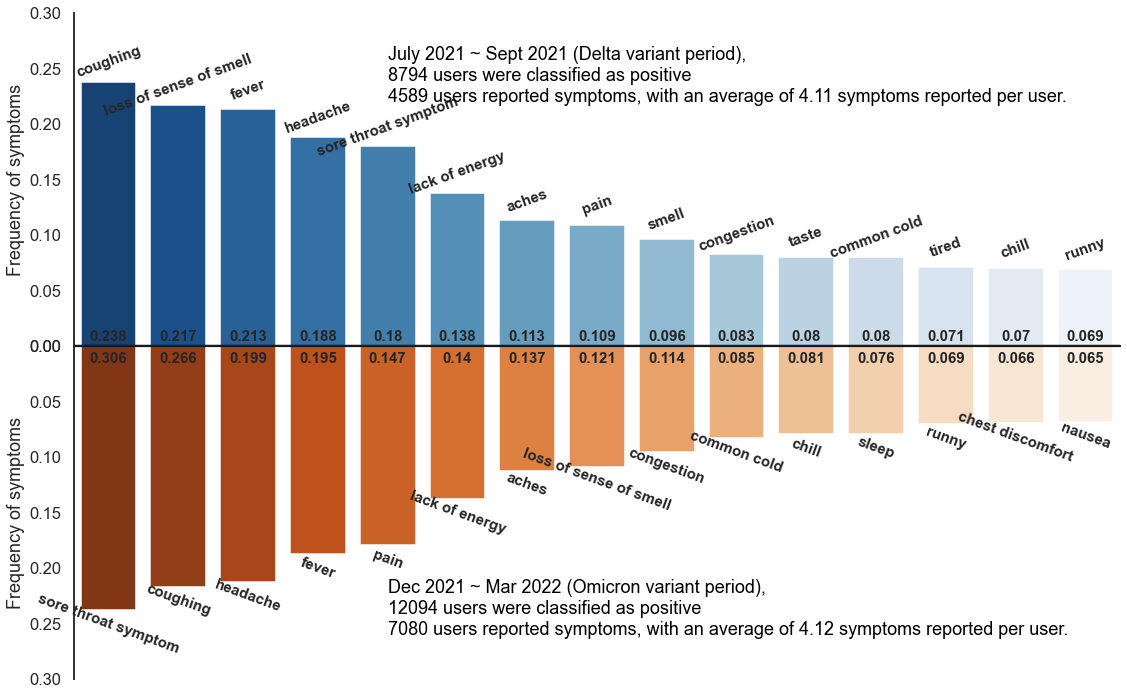

In [54]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", context="talk")
f, (ax1, ax2)  = plt.subplots(2, 1, figsize=(16, 10), sharex=True)
x1 = np.array(plot_DeltaBERT['index'])
y1 = np.array(plot_DeltaBERT.freq)
Delta_bar = sns.barplot(x=x1, y=y1, palette="Blues_r", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Frequency of symptoms")
ax1.set_ylim([0, 0.3])
ax1.set(xlabel=None)
ax1.set(xticklabels=[])  # remove the tick labels
for i in range(len(Delta_bar.patches)):
    p = Delta_bar.patches[i]
    Delta_bar.annotate(x1[i],
                   (p.get_x() + p.get_width() / 2., p.get_height()+0.01), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), size=15, rotation=20, weight='bold',
                   textcoords = 'offset points')
    Delta_bar.annotate( round(y1[i],3),
               (p.get_x() + p.get_width() / 2., 0.0), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), size=15, rotation=0, weight='bold',
               textcoords = 'offset points')

ax1.text(4, 0.22, "July 2021 ~ Sept 2021 (Delta variant period), \n8794 users were classified as positive \n4589 users reported symptoms, with an average of 4.11 symptoms reported per user.",
         horizontalalignment='left', size='medium', color='black')


######################
x2 = np.array(plot_OmicronBERT['index'])
y2 = np.array(plot_OmicronBERT.freq)
Omicron_bar = sns.barplot(x=x2, y=y1, palette="Oranges_r", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Frequency of symptoms")
ax2.set_ylim([0, 0.3])
ax2.set(xlabel=None)
ax2.set(xticklabels=[])  # remove the tick labels
for i in range(len(Omicron_bar.patches)):
    p = Omicron_bar.patches[i]
    Omicron_bar.annotate(x2[i],
                   (p.get_x() + p.get_width() / 2, p.get_height()+0.02), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), size=15, rotation=-20, weight='bold',
                   textcoords = 'offset points')
    Omicron_bar.annotate(round(y2[i],3),
           (p.get_x() + p.get_width() / 2., 0.02), 
           ha = 'center', va = 'center', 
           xytext = (0, 9), size=15, rotation=0, weight='bold',
           textcoords = 'offset points')
Omicron_bar.invert_yaxis()
ax2.text(4, 0.26, "Dec 2021 ~ Mar 2022 (Omicron variant period), \n12094 users were classified as positive \n7080 users reported symptoms, with an average of 4.12 symptoms reported per user.",
         horizontalalignment='left', size='medium', color='black')


sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
sns.despine(bottom=True)
plt.tight_layout(h_pad=-0.86)


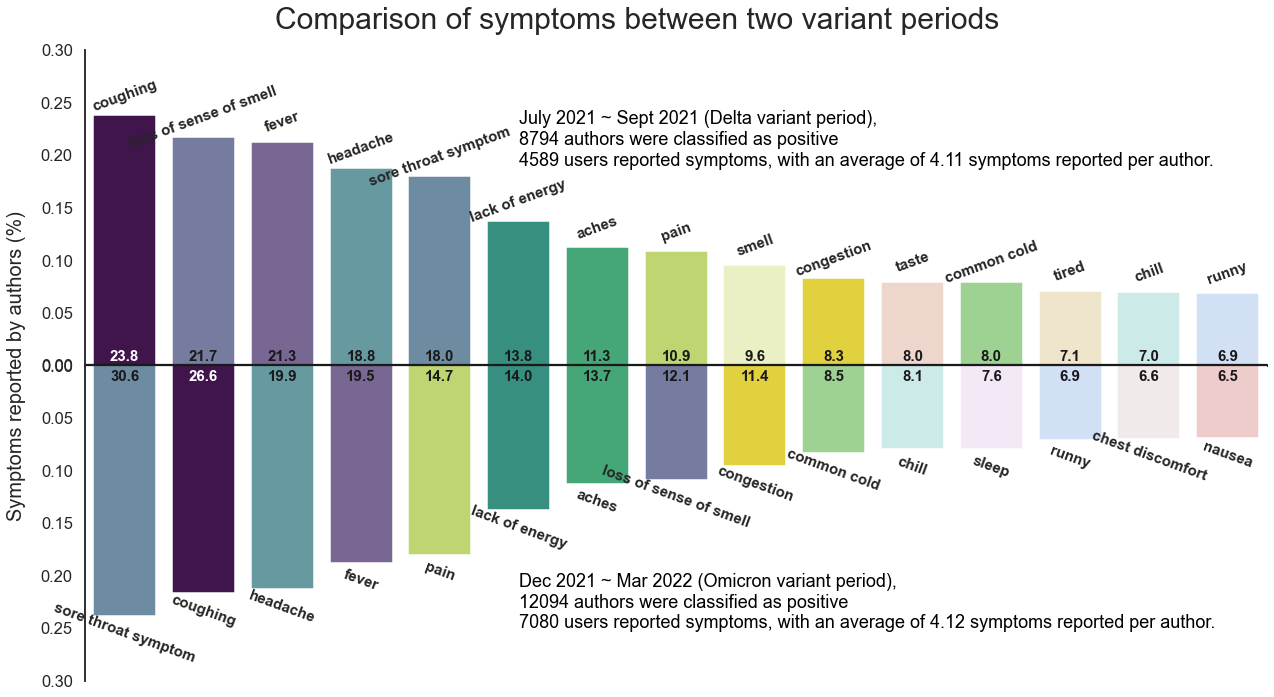

In [55]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sym_col_dic = {'coughing':"#440c54", 'fever':"#765e9a", 'loss of sense of smell':"#6e77a6",
       'sore throat symptom':"#658eaa", 'headache':"#5ca2aa", 'lack of energy':"#289e89", 
        'aches':"#35b779",'common cold':"#96dc88", 'pain':"#c7e661", 
        'congestion':"#fce624", 'nausea':"#f5c6c6", 'tired': "#f5e6c6",
       'chill':"#c7f0ec", 'chest discomfort':"#f2e9e9", 'sleep':"#f4e6f7", 'runny':"#ccdffc", 'smell':"#f0f7bc", 'taste':"#f5d4c6"
              }

sns.set_theme(style="white", context="talk")
f, (ax1, ax2)  = plt.subplots(2, 1, figsize=(18, 10), sharex=True)
x1 = np.array(plot_DeltaBERT['index'])
y1 = np.array(plot_DeltaBERT.freq)
Delta_bar = sns.barplot(x=x1, y=y1, palette= sns.color_palette([sym_col_dic[i] for i in x1]), ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Symptoms reported by authors (%)", fontsize =20)
ax1.yaxis.set_label_coords(-0.05, .0) #y label position

ax1.set_ylim([0, 0.3])
ax1.set(xlabel=None)
ax1.set(xticklabels=[])  # remove the tick labels
for i in range(len(Delta_bar.patches)):
    p = Delta_bar.patches[i]
    Delta_bar.annotate(x1[i],
                   (p.get_x() + p.get_width() / 2., p.get_height()+0.01), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), size=15, rotation=20, weight='bold',
                   textcoords = 'offset points')
    ## add frequency rate:
    if i==0:
        Delta_bar.annotate(round(y1[i]*100,3),  (p.get_x() + p.get_width() / 2., 0.0), ha = 'center', va = 'center', 
                   xytext = (0, 9), size=15, rotation=0, weight='bold',color='w', textcoords = 'offset points')
    else: 
        Delta_bar.annotate(round(y1[i]*100,3),  (p.get_x() + p.get_width() / 2., 0.0), ha = 'center', va = 'center', 
                   xytext = (0, 9), size=15, rotation=0, weight='bold',color='k', textcoords = 'offset points')

ax1.text(5, 0.19, "July 2021 ~ Sept 2021 (Delta variant period), \n8794 authors were classified as positive \n4589 users reported symptoms, with an average of 4.11 symptoms reported per author.",
         horizontalalignment='left', size='medium', color='black')

######################
x2 = np.array(plot_OmicronBERT['index'])
y2 = np.array(plot_OmicronBERT.freq)
Omicron_bar = sns.barplot(x=x2, y=y1, palette= sns.color_palette([sym_col_dic[i] for i in x2]), ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylim([0, 0.3])
ax2.set(xlabel=None)
ax2.set(xticklabels=[])  # remove the tick labels
for i in range(len(Omicron_bar.patches)):
    p = Omicron_bar.patches[i]
    Omicron_bar.annotate(x2[i],
                   (p.get_x() + p.get_width() / 2, p.get_height()+0.025), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), size=15, rotation=-20, weight='bold',
                   textcoords = 'offset points')
    ## add frequency rate:
    if i==1:
        Omicron_bar.annotate(round(y2[i]*100,3), (p.get_x() + p.get_width() / 2., 0.02), ha = 'center', va = 'center', 
               xytext = (0, 9), size=15, rotation=0, weight='bold',color='w',textcoords = 'offset points')
    else: 
        Omicron_bar.annotate(round(y2[i]*100,3), (p.get_x() + p.get_width() / 2., 0.02), ha = 'center', va = 'center', 
           xytext = (0, 9), size=15, rotation=0, weight='bold',color='k', textcoords = 'offset points')

Omicron_bar.invert_yaxis()
ax2.text(5, 0.25, "Dec 2021 ~ Mar 2022 (Omicron variant period), \n12094 authors were classified as positive \n7080 users reported symptoms, with an average of 4.12 symptoms reported per author.",
         horizontalalignment='left', size='medium', color='black')
ax1.text(6.5, 0.32, 'Comparison of symptoms between two variant periods', ha='center',fontsize=30)

sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
sns.despine(bottom=True)
plt.tight_layout(h_pad=-0.86)


# 2. ThemeRiver Plot

In [56]:
timebased_syms_Early_BERTlarge = pd.read_csv('./output_files/2020MarAprMay/timebased_syms_Early_BERTlarge.csv')
timebased_syms_Delta_BERTlarge = pd.read_csv('./output_files/2021JulAugSep/timebased_syms_Delta_BERTlarge.csv')
timebased_syms_Omicron_BERTlarge = pd.read_csv('./output_files/2021Dec2022Mar/timebased_syms_Omicron_BERTlarge.csv')

## 2.1 ThemeRiver Plot: Delta

In [57]:
timebased_syms_Delta_BERTlarge

,author,time,symptoms
0,----banana----,2021-07-10 22:55:53,['coughing']
1,-1911-,2021-09-13 17:48:42,"['lack of energy', 'fever', 'lack of energy', ..."
2,-BellaDomina-,2021-07-23 07:22:03,[]
3,-FuckleberryHinn-,2021-08-19 08:10:53,['lung']
4,-InTheRain,2021-07-25 00:43:53,['hypochondriac']
...,...,...,...
25569,zyadox_,2021-08-19 08:02:25,['loss of sense of smell']
25570,zyadox_,2021-09-02 12:19:07,"['smell', 'loss of sense of smell', 'smell', ' ']"
25571,zyadox_,2021-09-22 15:22:05,"['smell', 'loss of sense of smell']"
25572,zyadox_,2021-09-22 15:23:26,"['smell', 'loss of sense of smell']"


In [58]:
import ast
from datetime import datetime
ThemeRiver_dataDeltaBERT = timebased_syms_Delta_BERTlarge.copy()
ThemeRiver_dataDeltaBERT['symptoms'] = ThemeRiver_dataDeltaBERT['symptoms'].apply(lambda x: ast.literal_eval(x)).apply(','.join)
ThemeRiver_dataDeltaBERT = (ThemeRiver_dataDeltaBERT.set_index(['author', 'time'])
                   .apply(lambda x: x.str.split(",").explode()).reset_index())
ThemeRiver_dataDeltaBERT['time'] =ThemeRiver_dataDeltaBERT['time'].apply(lambda x: x.split()[0]) #remove hh:mm:ss in  date 
ThemeRiver_dataDeltaBERT['symptoms'].replace('', np.nan, inplace=True) #replace '' to nan
ThemeRiver_dataDeltaBERT = ThemeRiver_dataDeltaBERT.dropna() #remove nan rows
ThemeRiver_dataDeltaBERT = ThemeRiver_dataDeltaBERT.drop(['author'], axis=1)
ThemeRiver_dataDeltaBERT['symptoms_count'] = ThemeRiver_dataDeltaBERT.groupby(['time','symptoms'])['symptoms'].transform('count') #count symptom frequency
ThemeRiver_dataDeltaBERT = ThemeRiver_dataDeltaBERT.sort_values(by=['time']) #sorted by time
ThemeRiver_dataDeltaBERT = ThemeRiver_dataDeltaBERT.drop_duplicates() #drop duplicate rows
ThemeRiver_dataDeltaBERT['time'] = pd.to_datetime(ThemeRiver_dataDeltaBERT['time'], format='%Y-%m-%d')


In [59]:
#only consider some high-frequent symptoms
freq_num = 12
sym_select_DeltaBERT = DeltaSymFreqBERT.sort_values(by=['freq'],ascending =False).iloc[:freq_num, 0]
ThemeRiver_Delta_selectBERT = ThemeRiver_dataDeltaBERT.copy()
for index in ThemeRiver_Delta_selectBERT.index:
    if ThemeRiver_Delta_selectBERT.loc[index].symptoms not in set(sym_select_DeltaBERT):
        ThemeRiver_Delta_selectBERT = ThemeRiver_Delta_selectBERT.drop([index])
ThemeRiver_Delta_selectBERT  = ThemeRiver_Delta_selectBERT.sort_values(["time","symptoms"])  
ThemeRiver_Delta_selectBERT

,time,symptoms,symptoms_count
31693,2021-07-01,aches,2
25503,2021-07-01,common cold,1
24335,2021-07-01,coughing,5
38103,2021-07-01,fever,3
1292,2021-07-01,headache,3
...,...,...,...
13673,2021-10-01,loss of sense of smell,2
33387,2021-10-01,pain,1
11899,2021-10-01,smell,1
37932,2021-10-01,sore throat symptom,2


In [60]:
ThemeRiver_Delta_select_wideBERT = ThemeRiver_Delta_selectBERT.pivot(index='time',columns='symptoms',values='symptoms_count')
ThemeRiver_Delta_select_wideBERT = ThemeRiver_Delta_select_wideBERT.fillna(0)
ThemeRiver_Delta_select_wideBERT = ThemeRiver_Delta_select_wideBERT.reset_index().rename_axis(None, axis=1)
ThemeRiver_Delta_select_wideBERT = ThemeRiver_Delta_select_wideBERT.reindex(columns=['time']+list(sym_select_DeltaBERT))
time =  ThemeRiver_Delta_select_wideBERT.time
symptom_labels = [i for i in list(ThemeRiver_Delta_select_wideBERT.columns) if i !='time']
daySymFreq = [np.array(ThemeRiver_Delta_select_wideBERT.iloc[:,i]).astype('int') 
              for i in range(1,ThemeRiver_Delta_select_wideBERT.shape[1])]
ThemeRiver_Delta_select_wideBERT


,time,coughing,loss of sense of smell,fever,headache,sore throat symptom,lack of energy,aches,pain,smell,congestion,taste,common cold
0,2021-07-01,5.0,1.0,3.0,3.0,3.0,3.0,2.0,7.0,2.0,0.0,2.0,1.0
1,2021-07-02,4.0,3.0,8.0,10.0,9.0,3.0,8.0,6.0,2.0,0.0,0.0,3.0
2,2021-07-03,6.0,14.0,8.0,3.0,7.0,1.0,3.0,4.0,4.0,2.0,9.0,3.0
3,2021-07-04,10.0,7.0,4.0,7.0,10.0,8.0,2.0,5.0,6.0,3.0,4.0,3.0
4,2021-07-05,11.0,21.0,7.0,7.0,3.0,3.0,1.0,3.0,4.0,3.0,8.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,2021-09-27,14.0,14.0,8.0,11.0,6.0,6.0,4.0,4.0,6.0,1.0,4.0,3.0
89,2021-09-28,13.0,7.0,10.0,12.0,9.0,13.0,4.0,8.0,2.0,5.0,6.0,6.0
90,2021-09-29,18.0,7.0,6.0,10.0,6.0,7.0,3.0,9.0,0.0,6.0,4.0,7.0
91,2021-09-30,10.0,14.0,8.0,5.0,12.0,7.0,3.0,5.0,1.0,4.0,2.0,3.0


In [61]:
from scipy import stats
def gaussian_smooth(x, y, grid, sd):
    weights = np.transpose([stats.norm.pdf(grid, m, sd) for m in x])
    #weights = weights / weights.sum(0)
    return (weights * y).sum(1)

## 2.2 ThemeRiver Plot: Omicron

In [62]:
timebased_syms_Omicron_BERTlarge

,author,time,symptoms
0,-1911-,2022-01-21 21:31:15,"['smell', 'smell', 'smell', 'whole body']"
1,-1911-,2022-01-24 21:21:15,[]
2,-Boy-Mom,2021-12-22 03:36:39,"['clogged', 'breathe', 'nose']"
3,-CryptoSardine-,2022-01-01 23:26:51,"['sweating symptom', 'fever', 'trouble']"
4,-CryptoSardine-,2022-01-02 01:22:11,"['sleep', 'sleep']"
...,...,...,...
24227,zzDeathGodzz,2022-01-05 12:08:01,[' ']
24228,zzDeathGodzz,2022-01-09 08:19:50,"['sore throat symptom', 'coughing']"
24229,zzcczzcc,2022-01-15 21:55:11,"['scary', ' ']"
24230,zzcczzcc,2022-01-16 13:35:52,"['smell', 'congested', 'breathe', 'common cold']"


In [63]:
import ast
from datetime import datetime
ThemeRiver_dataOmicronBERT = timebased_syms_Omicron_BERTlarge.copy()
ThemeRiver_dataOmicronBERT['symptoms'] = ThemeRiver_dataOmicronBERT['symptoms'].apply(lambda x: ast.literal_eval(x)).apply(','.join)
ThemeRiver_dataOmicronBERT = (ThemeRiver_dataOmicronBERT.set_index(['author', 'time'])
                   .apply(lambda x: x.str.split(",").explode()).reset_index())
ThemeRiver_dataOmicronBERT['time'] =ThemeRiver_dataOmicronBERT['time'].apply(lambda x: x.split()[0]) #remove hh:mm:ss in  date 
ThemeRiver_dataOmicronBERT['symptoms'].replace('', np.nan, inplace=True) #replace '' to nan
ThemeRiver_dataOmicronBERT= ThemeRiver_dataOmicronBERT.dropna() #remove nan rows
ThemeRiver_dataOmicronBERT = ThemeRiver_dataOmicronBERT.drop(['author'], axis=1)
ThemeRiver_dataOmicronBERT['symptoms_count'] = ThemeRiver_dataOmicronBERT.groupby(['time','symptoms'])['symptoms'].transform('count') #count symptom frequency
ThemeRiver_dataOmicronBERT = ThemeRiver_dataOmicronBERT.sort_values(by=['time']) #sorted by time
ThemeRiver_dataOmicronBERT= ThemeRiver_dataOmicronBERT.drop_duplicates() #drop duplicate rows
ThemeRiver_dataOmicronBERT['time'] = pd.to_datetime(ThemeRiver_dataOmicronBERT['time'], format='%Y-%m-%d')


In [64]:
#only consider some high-frequent symptoms
freq_num = 10
sym_select_OmicronBERT = OmicronSymFreqBERT.sort_values(by=['freq'],ascending =False).iloc[:freq_num, 0]
ThemeRiver_Omicron_selectBERT = ThemeRiver_dataOmicronBERT.copy()
for index in ThemeRiver_Omicron_selectBERT.index:
    if ThemeRiver_Omicron_selectBERT.loc[index].symptoms not in set(sym_select_OmicronBERT):
        ThemeRiver_Omicron_selectBERT = ThemeRiver_Omicron_selectBERT.drop([index])
ThemeRiver_Omicron_selectBERT  = ThemeRiver_Omicron_selectBERT.sort_values(["time","symptoms"])  
ThemeRiver_Omicron_selectBERT

,time,symptoms,symptoms_count
35664,2021-12-15,aches,6
37945,2021-12-15,common cold,7
10633,2021-12-15,congestion,4
35665,2021-12-15,coughing,14
42403,2021-12-15,fever,8
...,...,...,...
21244,2022-03-10,headache,1
40470,2022-03-10,lack of energy,2
30957,2022-03-10,loss of sense of smell,2
21241,2022-03-10,pain,2


In [65]:
ThemeRiver_Omicron_select_wideBERT = ThemeRiver_Omicron_selectBERT.pivot(index='time',columns='symptoms',values='symptoms_count')
ThemeRiver_Omicron_select_wideBERT = ThemeRiver_Omicron_select_wideBERT.fillna(0)
ThemeRiver_Omicron_select_wideBERT = ThemeRiver_Omicron_select_wideBERT.reset_index().rename_axis(None, axis=1)
ThemeRiver_Omicron_select_wideBERT = ThemeRiver_Omicron_select_wideBERT.reindex(columns=['time']+list(sym_select_OmicronBERT))
time =  ThemeRiver_Omicron_select_wideBERT.time
symptom_labels = [i for i in list(ThemeRiver_Omicron_select_wideBERT.columns) if i !='time']
daySymFreq = [np.array(ThemeRiver_Omicron_select_wideBERT.iloc[:,i]).astype('int') 
              for i in range(1,ThemeRiver_Omicron_select_wideBERT.shape[1])]
ThemeRiver_Omicron_select_wideBERT

,time,sore throat symptom,coughing,headache,fever,pain,lack of energy,aches,loss of sense of smell,congestion,common cold
0,2021-12-15,12.0,14.0,17.0,8.0,4.0,3.0,6.0,11.0,4.0,7.0
1,2021-12-16,14.0,18.0,15.0,15.0,8.0,9.0,11.0,21.0,8.0,10.0
2,2021-12-17,34.0,27.0,29.0,23.0,24.0,6.0,14.0,9.0,8.0,12.0
3,2021-12-18,30.0,23.0,25.0,21.0,11.0,13.0,15.0,20.0,11.0,14.0
4,2021-12-19,53.0,36.0,26.0,14.0,26.0,19.0,13.0,35.0,14.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...
81,2022-03-06,4.0,5.0,9.0,7.0,9.0,1.0,3.0,2.0,2.0,0.0
82,2022-03-07,13.0,6.0,1.0,0.0,5.0,5.0,1.0,0.0,1.0,1.0
83,2022-03-08,9.0,7.0,8.0,8.0,8.0,7.0,7.0,5.0,1.0,2.0
84,2022-03-09,21.0,13.0,6.0,4.0,7.0,1.0,2.0,3.0,4.0,6.0


## 2.3 ThemeRiver Plot: Early stage

In [66]:
timebased_syms_Early_BERTlarge

,author,time,symptoms
0,_iwasnotmagnificent_,2020-04-01 15:22:15,"['dyspnea', 'loss of sense of smell', 'tight c..."
1,_iwasnotmagnificent_,2020-04-01 23:10:22,['stomach ache']
2,_iwasnotmagnificent_,2020-04-03 02:18:37,"['eructation', 'nose']"
3,_iwasnotmagnificent_,2020-04-04 18:21:12,"['dizziness', 'otalgia', 'loss of sense of sme..."
4,_iwasnotmagnificent_,2020-04-03 16:39:57,[]
...,...,...,...
3614,zwordz23,2020-05-29 16:25:53,['pain']
3615,zwordz23,2020-05-29 16:36:24,[]
3616,zwordz23,2020-05-29 18:53:55,"['coughing', 'jaw', 'lack of energy', 'pressur..."
3617,zwordz23,2020-05-29 23:23:50,[]


In [67]:
import ast
from datetime import datetime
ThemeRiver_dataEarlyBERT = timebased_syms_Early_BERTlarge.copy()
ThemeRiver_dataEarlyBERT['symptoms'] = ThemeRiver_dataEarlyBERT['symptoms'].apply(lambda x: ast.literal_eval(x)).apply(','.join)
ThemeRiver_dataEarlyBERT = (ThemeRiver_dataEarlyBERT.set_index(['author', 'time'])
                   .apply(lambda x: x.str.split(",").explode()).reset_index())
ThemeRiver_dataEarlyBERT['time'] =ThemeRiver_dataEarlyBERT['time'].apply(lambda x: x.split()[0]) #remove hh:mm:ss in  date 
ThemeRiver_dataEarlyBERT['symptoms'].replace('', np.nan, inplace=True) #replace '' to nan
ThemeRiver_dataEarlyBERT= ThemeRiver_dataEarlyBERT.dropna() #remove nan rows
ThemeRiver_dataEarlyBERT = ThemeRiver_dataEarlyBERT.drop(['author'], axis=1)
ThemeRiver_dataEarlyBERT['symptoms_count'] = ThemeRiver_dataEarlyBERT.groupby(['time','symptoms'])['symptoms'].transform('count') #count symptom frequency
ThemeRiver_dataEarlyBERT = ThemeRiver_dataEarlyBERT.sort_values(by=['time']) #sorted by time
ThemeRiver_dataEarlyBERT= ThemeRiver_dataEarlyBERT.drop_duplicates() #drop duplicate rows
ThemeRiver_dataEarlyBERT['time'] = pd.to_datetime(ThemeRiver_dataEarlyBERT['time'], format='%Y-%m-%d')


In [68]:
#consider all symptoms to match Delta and Omicron
freq_num = 100
sym_select_EarlyBERT = EarlySymFreqBERT.sort_values(by=['freq'],ascending =False).iloc[:freq_num, 0]
ThemeRiver_Early_selectBERT = ThemeRiver_dataEarlyBERT.copy()
for index in ThemeRiver_Early_selectBERT.index:
    if ThemeRiver_Early_selectBERT.loc[index].symptoms not in set(sym_select_EarlyBERT):
        ThemeRiver_Early_selectBERT = ThemeRiver_Early_selectBERT.drop([index])
ThemeRiver_Early_selectBERT  = ThemeRiver_Early_selectBERT.sort_values(["time","symptoms"])  
ThemeRiver_Early_selectBERT

,time,symptoms,symptoms_count
3759,2020-03-16,disorder due to infection,1
3758,2020-03-16,fever,1
3757,2020-03-16,pain,1
2662,2020-03-17,headache,1
2663,2020-03-17,respiratory distress,1
...,...,...,...
397,2020-05-31,malignant neoplastic disease,1
402,2020-05-31,pressure - physical agent,1
4390,2020-05-31,smell,1
395,2020-05-31,tachycardia,2


In [69]:
ThemeRiver_Early_select_wideBERT = ThemeRiver_Early_selectBERT.pivot(index='time',columns='symptoms',values='symptoms_count')
ThemeRiver_Early_select_wideBERT = ThemeRiver_Early_select_wideBERT.fillna(0)
ThemeRiver_Early_select_wideBERT = ThemeRiver_Early_select_wideBERT.reset_index().rename_axis(None, axis=1)
ThemeRiver_Early_select_wideBERT = ThemeRiver_Early_select_wideBERT.reindex(columns=['time']+list(sym_select_EarlyBERT))
time =  ThemeRiver_Early_select_wideBERT.time
symptom_labels = [i for i in list(ThemeRiver_Early_select_wideBERT.columns) if i !='time']
daySymFreq = [np.array(ThemeRiver_Early_select_wideBERT.iloc[:,i]).astype('int') 
              for i in range(1,ThemeRiver_Early_select_wideBERT.shape[1])]
ThemeRiver_Early_select_wideBERT

,time,coughing,fever,loss of sense of smell,headache,sore throat symptom,pain,dyspnea,lack of energy,chest discomfort,...,wheezing,jaw,undifferentiated illness: vague ill health,swelling,bloating symptom,inflammation,eructation,hydrated,exertion,respiratory distress
0,2020-03-16,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-03-17,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2020-03-19,6.0,3.0,0.0,2.0,0.0,1.0,1.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-03-20,2.0,3.0,1.0,3.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-03-21,19.0,5.0,0.0,2.0,5.0,3.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2020-05-27,3.0,2.0,1.0,2.0,0.0,6.0,1.0,4.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
72,2020-05-28,6.0,2.0,1.0,4.0,2.0,2.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73,2020-05-29,5.0,3.0,3.0,4.0,1.0,3.0,2.0,7.0,2.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
74,2020-05-30,7.0,7.0,4.0,7.0,7.0,2.0,2.0,1.0,4.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Together

common sym: {'pain', 'fever', 'headache', 'aches', 'loss of sense of smell', 'sore throat symptom', 'lack of energy', 'congestion', 'coughing', 'common cold'}


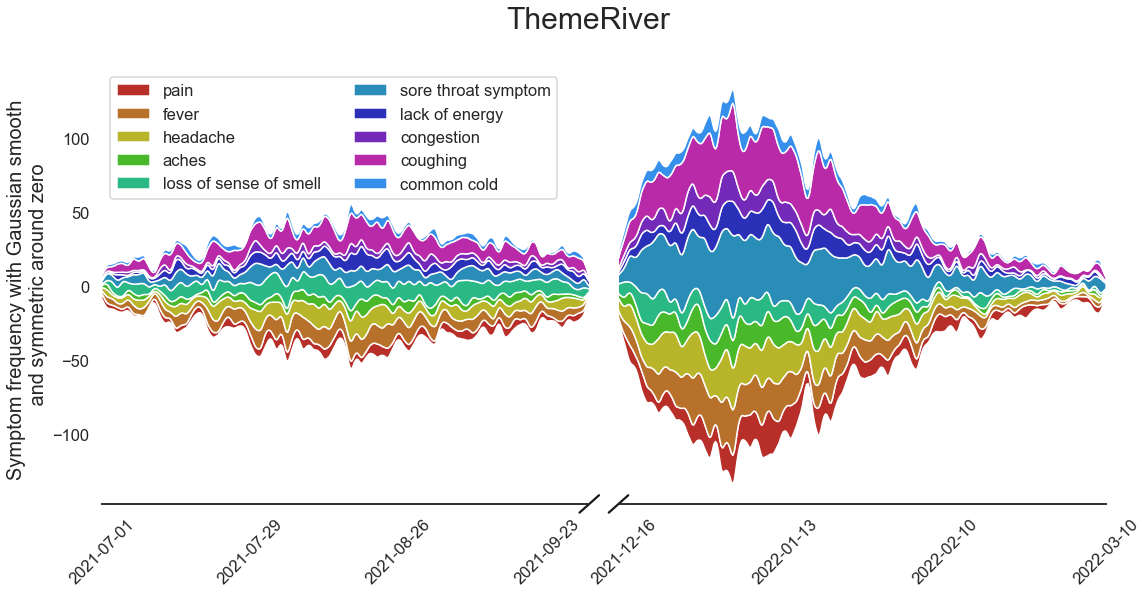

In [70]:
#only Delta and Omicron
from pandas import Timestamp
from datetime import datetime, timezone

common_symBERT = set(sym_select_DeltaBERT).intersection(set(sym_select_OmicronBERT))
print('common sym:',common_symBERT)
ThemeRiver_Del_Omi_select_wide = pd.concat([
    ThemeRiver_Delta_select_wideBERT[['time']+list(common_symBERT)],
    ThemeRiver_Omicron_select_wideBERT[['time']+list(common_symBERT)],
],axis =0)
ThemeRiver_Del_Omi_select_wide

time =  ThemeRiver_Del_Omi_select_wide.time
symptom_labels = [i for i in list(ThemeRiver_Del_Omi_select_wide.columns) if i !='time']
daySymFreq = [np.array(ThemeRiver_Del_Omi_select_wide.iloc[:,i]).astype('int') 
              for i in range(1,ThemeRiver_Del_Omi_select_wide.shape[1])]

BlueCOLORS = ["#b82f2a", "#b8712a", "#b8b52a", "#49b82a", "#2ab884","#2a8db8","#2a31b8","#732ab8","#b82aa7","3690eb"] #3690eb","#0a81f7"]

time_shrink = 5e+13
fig,(ax1,ax2) = plt.subplots(1, 2, sharey=True,  figsize=(18, 8))

shrink_time_range1 = Timestamp('2021-07-01 00:00:00').value/time_shrink
shrink_time_range2 = Timestamp('2021-10-01 00:00:00').value/time_shrink
shrink_time_range3 = Timestamp('2021-12-15 00:00:00').value/time_shrink
shrink_time_range4 =Timestamp('2022-03-10 00:00:00').value/time_shrink

grid = np.linspace(shrink_time_range1,shrink_time_range4, num=1000)
y_smoothed = [gaussian_smooth(time.apply(lambda x: x.value)/time_shrink, y, grid, sd =1) for y in daySymFreq]
ax1.stackplot(grid, y_smoothed, baseline="sym",colors=BlueCOLORS[0:len(common_symBERT)], labels =list(common_symBERT)) 
ax2.stackplot(grid, y_smoothed, baseline="sym",colors=BlueCOLORS[0:len(common_symBERT)], labels =list(common_symBERT))

t = 10
time_point = np.linspace(shrink_time_range1, shrink_time_range4, t)
time_axis_num = list(time_point*time_shrink/1e+9)
time_axis_str = [datetime.fromtimestamp(int(i), timezone.utc).strftime('%Y-%m-%d %H:%M:%S')[:10] for i in time_axis_num]

ax1.set_xticks(time_point[0: int(t/2-1)], time_axis_str[0: int(t/2-1)], rotation=45)
ax2.set_xticks(time_point[int(t/2): ], time_axis_str[int(t/2): ], rotation=45)

ax1.set_xlim(shrink_time_range1, shrink_time_range2)  
ax2.set_xlim(shrink_time_range3 , shrink_time_range4)  
ax1.set_ylabel('Symptom frequency with Gaussian smooth \n and symmetric around zero',fontsize=20)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax1.legend(loc='upper left',ncol=2)

d = .02 # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1-d,1+d),(-d,+d), **kwargs) # top-left diagonal
kwargs.update(transform=ax2.transAxes) # switch to the bottom axes
ax2.plot((-d,d),(-d,+d), **kwargs) # top-right diagonal
fig.text(0.5, 0.95, 'ThemeRiver', ha='center',fontsize=30)

plt.subplots_adjust(wspace= 0.06) #length between two subplot



common sym: {'pain', 'fever', 'headache', 'aches', 'loss of sense of smell', 'sore throat symptom', 'lack of energy', 'congestion', 'coughing', 'common cold'}


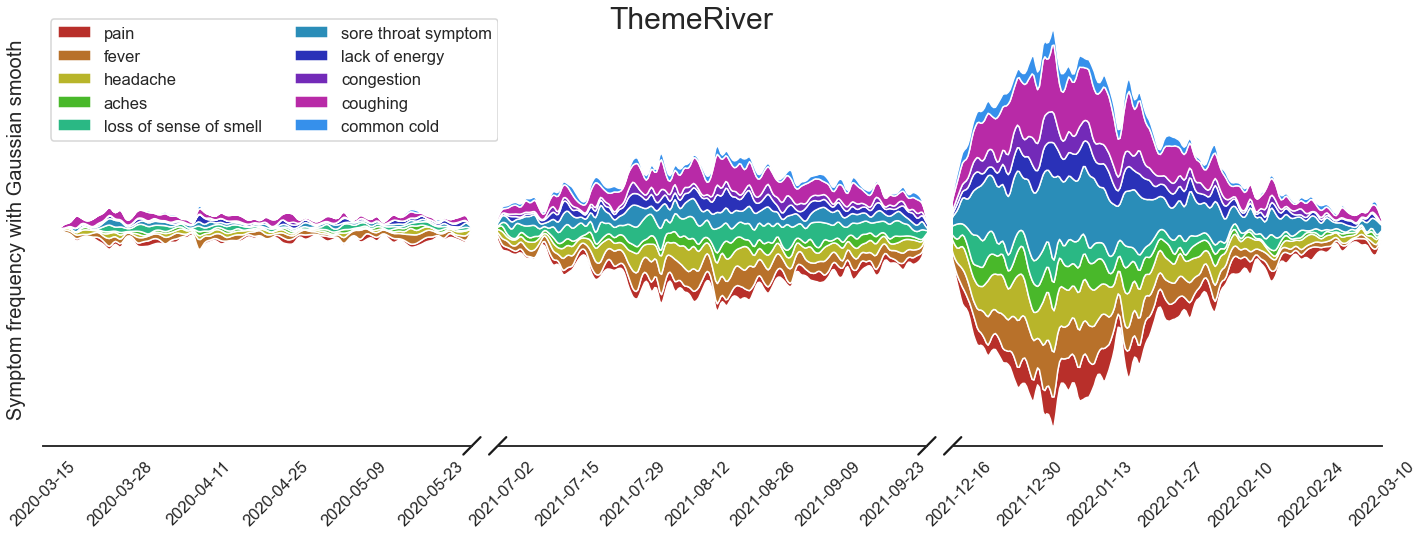

In [71]:
#Delta, Omicron, and Early stage
from pandas import Timestamp
from datetime import datetime, timezone

common_symBERT = set(sym_select_DeltaBERT).intersection(set(sym_select_OmicronBERT))
print('common sym:',common_symBERT)
ThemeRiver_Del_Omi_Ear_select_wide = pd.concat([
    ThemeRiver_Early_select_wideBERT[['time']+list(common_symBERT)],
    ThemeRiver_Delta_select_wideBERT[['time']+list(common_symBERT)],
    ThemeRiver_Omicron_select_wideBERT[['time']+list(common_symBERT)],
],axis =0)
ThemeRiver_Del_Omi_Ear_select_wide

time =  ThemeRiver_Del_Omi_Ear_select_wide.time
symptom_labels = [i for i in list(ThemeRiver_Del_Omi_Ear_select_wide.columns) if i !='time']
daySymFreq = [np.array(ThemeRiver_Del_Omi_Ear_select_wide.iloc[:,i]).astype('int') 
              for i in range(1,ThemeRiver_Del_Omi_Ear_select_wide.shape[1])]
BlueCOLORS = ["#b82f2a", "#b8712a", "#b8b52a", "#49b82a", "#2ab884","#2a8db8","#2a31b8","#732ab8","#b82aa7","3690eb"] #3690eb","#0a81f7"]

time_shrink = 5e+13
fig,(ax1,ax2,ax3) = plt.subplots(1, 3, sharey=True,  figsize=(24, 8))

shrink_time_range1 = Timestamp('2020-03-15 00:00:00').value/time_shrink
shrink_time_range2 = Timestamp('2020-05-31 00:00:00').value/time_shrink
shrink_time_range3 = Timestamp('2021-07-01 00:00:00').value/time_shrink
shrink_time_range4 = Timestamp('2021-10-01 00:00:00').value/time_shrink
shrink_time_range5 = Timestamp('2021-12-15 00:00:00').value/time_shrink
shrink_time_range6 = Timestamp('2022-03-10 00:00:00').value/time_shrink

grid = np.linspace(shrink_time_range1,shrink_time_range6, num=2000)
y_smoothed = [gaussian_smooth(time.apply(lambda x: x.value)/time_shrink, y, grid, sd =1) for y in daySymFreq]
ax1.stackplot(grid, y_smoothed, baseline="sym",colors=BlueCOLORS[0:len(common_symBERT)], labels =list(common_symBERT)) 
ax2.stackplot(grid, y_smoothed, baseline="sym",colors=BlueCOLORS[0:len(common_symBERT)], labels =list(common_symBERT))
ax3.stackplot(grid, y_smoothed, baseline="sym",colors=BlueCOLORS[0:len(common_symBERT)], labels =list(common_symBERT)) 
t = 53
time_point = np.linspace(shrink_time_range1, shrink_time_range6, t)
time_axis_num = list(time_point*time_shrink/1e+9)
time_axis_str = [datetime.fromtimestamp(int(i), timezone.utc).strftime('%Y-%m-%d %H:%M:%S')[:10] for i in time_axis_num]

ax1.set_xticks(time_point[0: int(t/3-1)], time_axis_str[0: int(t/3-1)], rotation=45)
ax2.set_xticks(time_point, time_axis_str, rotation=45)
ax3.set_xticks(time_point[int(2*t/3-1): ], time_axis_str[int(2*t/3-1): ], rotation=45)

# ax1.axes.get_yaxis().set_visible(False)
ax1.set_yticklabels([])
ax1.set_xlim(shrink_time_range1, shrink_time_range2)  
ax2.set_xlim(shrink_time_range3 , shrink_time_range4)  
ax3.set_xlim(shrink_time_range5, shrink_time_range6)  
# ax1.set_ylabel('Symptom frequency with Gaussian smooth \n and symmetric around zero',fontsize=20)
ax1.set_ylabel('Symptom frequency with Gaussian smooth',fontsize=20)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax1.legend(loc='upper left',ncol=2)

d = .02 # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1-d,1+d),(-d,+d), **kwargs) # top-left diagonal
kwargs.update(transform=ax2.transAxes) # switch to the bottom axes
ax2.plot((-d,d),(-d,+d), **kwargs) # top-right diagonal

ax2.plot((1-d,1+d),(-d,+d), **kwargs) # top-left diagonal
kwargs.update(transform=ax3.transAxes) # switch to the bottom axes
ax3.plot((-d,d),(-d,+d), **kwargs) # top-right diagonal

fig.text(0.5, 0.85, 'ThemeRiver', ha='center',fontsize=30)

plt.subplots_adjust(wspace= 0.06) #length between two subplot


# 3. Chord Diagram (Python+R)

## 3.1 Chord Diagram: Delta

In [73]:
timebased_syms_Delta_BERTlarge = pd.read_csv('./output_files/2021JulAugSep/timebased_syms_Delta_BERTlarge.csv')
DeltaSymFreqBERT = pd.read_csv('./output_files/2021JulAugSep/Freq_by_user_BERT.csv')

In [74]:
import ast
Chord_Diagram_dataDeltaBERT = timebased_syms_Delta_BERTlarge.copy()[['author','symptoms']]
Chord_Diagram_dataDeltaBERT['symptoms'] = Chord_Diagram_dataDeltaBERT['symptoms'].apply(lambda x: ast.literal_eval(x)).apply(','.join)
Chord_Diagram_dataDeltaBERT['AllSymForOne'] = Chord_Diagram_dataDeltaBERT.groupby(['author'])['symptoms'].transform(lambda x : ','.join(x))
Chord_Diagram_dataDeltaBERT = Chord_Diagram_dataDeltaBERT[['author','AllSymForOne']].drop_duplicates() 
Chord_Diagram_dataDeltaBERT = Chord_Diagram_dataDeltaBERT.reset_index(drop=True)
Chord_Diagram_dataDeltaBERT

,author,AllSymForOne
0,----banana----,coughing
1,-1911-,"lack of energy,fever,lack of energy,coughing"
2,-BellaDomina-,
3,-FuckleberryHinn-,lung
4,-InTheRain,"hypochondriac,,,"
...,...,...
5871,zsepthenne,nausea
5872,zwernjayden,
5873,zxykzxyk,"coughing,headache,lack of energy,loss of sense..."
5874,zyadox_,"loss of sense of smell,smell,loss of sense of ..."


In [75]:
ten_sym_select = {'aches','common cold','congestion','coughing','fever','headache','lack of energy',
                  'loss of sense of smell','pain','sore throat symptom'}

In [ ]:
<prevent running>
sym_select = ten_sym_select #make them same as BioBERT

import numpy as np
import pandas as pd
# initialize cross-table symptoms
cross_sym_matrixDeltaBERT = pd.DataFrame(np.zeros((len(sym_select), len(sym_select))))
cross_sym_matrixDeltaBERT = cross_sym_matrixDeltaBERT.set_axis(list(sym_select), axis=0) 
cross_sym_matrixDeltaBERT = cross_sym_matrixDeltaBERT.set_axis(list(sym_select), axis=1)
for i in range(len(Chord_Diagram_dataDeltaBERT['AllSymForOne'])):
    oneAuthorSym = Chord_Diagram_dataDeltaBERT['AllSymForOne'][i].split(',')
    oneAuthorSym = list(set([i for i in oneAuthorSym if i in set(sym_select)]))
    if oneAuthorSym ==[]:
        continue
    else:
        for s1 in oneAuthorSym:
            for s2 in oneAuthorSym:
                cross_sym_matrixDeltaBERT[s1].loc[[s2]] += 1

np.fill_diagonal(cross_sym_matrixDeltaBERT.values, 0) # make diag zero

###### make lower Triangular Matrix zero ######
# col_name = cross_sym_matrixDeltaBERT.columns
# for i in range(cross_sym_matrixDeltaBERT.shape[0]):
#     for j in range(i, cross_sym_matrixDeltaBERT.shape[0]):
#         cross_sym_matrixDeltaBERT[col_name[i]].loc[[col_name[j]]] = 0
# cross_sym_matrixDeltaBERT
################################################

# cross_sym_matrixDeltaBERT.to_csv('./output_files/2021JulAugSep/cross_sym_matrixDeltaBERT.csv', index=True)

In [76]:
cross_sym_matrixDeltaBERT = pd.read_csv('./output_files/2021JulAugSep/cross_sym_matrixDeltaBERT.csv',index_col=0)
cross_sym_matrixDeltaBERT

,pain,coughing,sore throat symptom,common cold,congestion,headache,loss of sense of smell,fever,lack of energy,aches
pain,0.0,182.0,137.0,59.0,72.0,186.0,142.0,167.0,116.0,114.0
coughing,182.0,0.0,349.0,123.0,198.0,334.0,326.0,420.0,256.0,220.0
sore throat symptom,137.0,349.0,0.0,116.0,171.0,280.0,227.0,313.0,178.0,157.0
common cold,59.0,123.0,116.0,0.0,53.0,98.0,121.0,116.0,71.0,58.0
congestion,72.0,198.0,171.0,53.0,0.0,146.0,144.0,144.0,106.0,92.0
headache,186.0,334.0,280.0,98.0,146.0,0.0,244.0,321.0,246.0,212.0
loss of sense of smell,142.0,326.0,227.0,121.0,144.0,244.0,0.0,287.0,192.0,171.0
fever,167.0,420.0,313.0,116.0,144.0,321.0,287.0,0.0,238.0,262.0
lack of energy,116.0,256.0,178.0,71.0,106.0,246.0,192.0,238.0,0.0,165.0
aches,114.0,220.0,157.0,58.0,92.0,212.0,171.0,262.0,165.0,0.0


## 3.2 Chord Diagram: Omicron

In [77]:
timebased_syms_Omicron_BERTlarge = pd.read_csv('./output_files/2021Dec2022Mar/timebased_syms_Omicron_BERTlarge.csv')
OmicronSymFreqBERT = pd.read_csv('./output_files/2021Dec2022Mar/Freq_by_user_BERT.csv')

In [78]:
import ast
Chord_Diagram_dataOmicronBERT = timebased_syms_Omicron_BERTlarge.copy()[['author','symptoms']]
Chord_Diagram_dataOmicronBERT['symptoms'] = Chord_Diagram_dataOmicronBERT['symptoms'].apply(lambda x: ast.literal_eval(x)).apply(','.join)
Chord_Diagram_dataOmicronBERT['AllSymForOne'] = Chord_Diagram_dataOmicronBERT.groupby(['author'])['symptoms'].transform(lambda x : ','.join(x))
Chord_Diagram_dataOmicronBERT = Chord_Diagram_dataOmicronBERT[['author','AllSymForOne']].drop_duplicates() 
Chord_Diagram_dataOmicronBERT = Chord_Diagram_dataOmicronBERT.reset_index(drop=True)
Chord_Diagram_dataOmicronBERT

,author,AllSymForOne
0,-1911-,"smell,smell,smell,whole body,"
1,-Boy-Mom,"clogged,breathe,nose"
2,-CryptoSardine-,"sweating symptom,fever,trouble,sleep,sleep,sle..."
3,-HouseTargaryen-,awful
4,-LuBu,
...,...,...
8783,zuzzthefuzz,"otalgia,awful,pressure - physical agent,sore t..."
8784,zyflin,
8785,zz-de,
8786,zzDeathGodzz,",sore throat symptom,coughing"


In [ ]:
<prevent running>
sym_select = ten_sym_select #make them same as BioBERT
print(sym_select) 

import numpy as np
import pandas as pd
# initialize cross-table symptoms
cross_sym_matrixOmicronBERT  = pd.DataFrame(np.zeros((len(sym_select), len(sym_select))))
cross_sym_matrixOmicronBERT = cross_sym_matrixOmicronBERT.set_axis(list(sym_select), axis=0) 
cross_sym_matrixOmicronBERT = cross_sym_matrixOmicronBERT.set_axis(list(sym_select), axis=1)
for i in range(len(Chord_Diagram_dataOmicronBERT['AllSymForOne'])):
    oneAuthorSym = Chord_Diagram_dataOmicronBERT['AllSymForOne'][i].split(',')
    oneAuthorSym = list(set([i for i in oneAuthorSym if i in set(sym_select)]))
    if oneAuthorSym ==[]:
        continue
    else:
        for s1 in oneAuthorSym:
            for s2 in oneAuthorSym:
                cross_sym_matrixOmicronBERT[s1].loc[[s2]] += 1

np.fill_diagonal(cross_sym_matrixOmicronBERT.values, 0) # make diag zero

###### make lower Triangular Matrix zero ######
# col_name = cross_sym_matrixOmicronBERT.columns
# for i in range(cross_sym_matrixOmicronBERT.shape[0]):
#     for j in range(i, cross_sym_matrixOmicronBERT.shape[0]):
#         cross_sym_matrixOmicronBERT[col_name[i]].loc[[col_name[j]]] = 0
# cross_sym_matrixOmicronBERT
################################################

# cross_sym_matrixOmicronBERT.to_csv('./output_files/2021Dec2022Mar/cross_sym_matrixOmicronBERT.csv', index=True)

In [79]:
cross_sym_matrixOmicronBERT = pd.read_csv('./output_files/2021Dec2022Mar/cross_sym_matrixOmicronBERT.csv',index_col=0)
cross_sym_matrixOmicronBERT

,pain,coughing,sore throat symptom,common cold,congestion,headache,loss of sense of smell,fever,lack of energy,aches
pain,0.0,374.0,395.0,105.0,161.0,310.0,142.0,272.0,192.0,242.0
coughing,374.0,0.0,875.0,223.0,420.0,571.0,277.0,600.0,420.0,412.0
sore throat symptom,395.0,875.0,0.0,230.0,407.0,648.0,245.0,613.0,453.0,422.0
common cold,105.0,223.0,230.0,0.0,115.0,164.0,98.0,146.0,113.0,118.0
congestion,161.0,420.0,407.0,115.0,0.0,281.0,146.0,272.0,236.0,216.0
headache,310.0,571.0,648.0,164.0,281.0,0.0,205.0,494.0,378.0,403.0
loss of sense of smell,142.0,277.0,245.0,98.0,146.0,205.0,0.0,205.0,159.0,156.0
fever,272.0,600.0,613.0,146.0,272.0,494.0,205.0,0.0,333.0,453.0
lack of energy,192.0,420.0,453.0,113.0,236.0,378.0,159.0,333.0,0.0,287.0
aches,242.0,412.0,422.0,118.0,216.0,403.0,156.0,453.0,287.0,0.0


## Table: COVID-19 symptoms extraction

In [80]:
DeltaSymFreqBioBERT = pd.read_csv('./output_files/2021JulAugSep/Freq_by_user_BioBERT.csv').sort_values(by=['freq'],ascending=False)
DeltaSymFreqBERT = pd.read_csv('./output_files/2021JulAugSep/Freq_by_user_BERT.csv').sort_values(by=['freq'],ascending=False)
OmicronSymFreqBioBERT = pd.read_csv('./output_files/2021Dec2022Mar/Freq_by_user_BioBERT.csv').sort_values(by=['freq'],ascending=False)
OmicronSymFreqBERT = pd.read_csv('./output_files/2021Dec2022Mar/Freq_by_user_BERT.csv').sort_values(by=['freq'],ascending=False)
EarlyStageSymFreqBioBERT = pd.read_csv('./output_files/2020MarAprMay/Freq_by_user_BioBERT.csv').sort_values(by=['freq'],ascending=False)
EarlyStageSymFreqBERT = pd.read_csv('./output_files/2020MarAprMay/Freq_by_user_BERT.csv').sort_values(by=['freq'],ascending=False)



In [81]:
DeltaSymFreqBioBERT.columns = ['Symptom', 'count_freq_DeltaBioBERT', 'freq_DeltaBioBERT']
DeltaSymFreqBERT.columns = ['Symptom', 'count_freq_DeltaBERT', 'freq_DeltaBERT']
OmicronSymFreqBioBERT.columns = ['Symptom', 'count_freq_OmicronBioBERT', 'freq_OmicronBioBERT']
OmicronSymFreqBERT.columns = ['Symptom', 'count_freq_OmicronBERT', 'freq_OmicronBERT']
EarlyStageSymFreqBioBERT.columns = ['Symptom', 'count_freq_EarlyBioBERT', 'freq_EarlyBioBERT']
EarlyStageSymFreqBERT.columns = ['Symptom', 'count_freq_EarlyBERT', 'freq_EarlyBERT']


# 1: Chi-square independent Test with Twitter

In [84]:
from scipy.stats import chi2_contingency
from scipy.stats import combine_pvalues

sym_list = ['coughing','fever','loss of sense of smell','headache','sore throat symptom','dyspnea','pain',
            'lack of energy','aches','chest pain','diarrhea symptom','nausea','dizziness']
pvalue_list = []
for sym in sym_list:
    Our=int(ResultTable[ResultTable['Symptom']==sym]['Our study (BERT) on Covid early stage'].item().split()[0])
    Sarker=int(ResultTable[ResultTable['Symptom']==sym]['Sarker et al. study on Twitter'].item().split()[0])
    df = pd.DataFrame({'Model': ['Our'] *294 + ['Sarker et al.'] * 169,
                       'Symptom': [sym]*Our+['non-'+sym]*(294-Our)+[sym]*Sarker+['non-'+sym]*(169-Sarker)}) 
    crosstab= pd.crosstab(df['Model'], df['Symptom']) 
    print(crosstab)
    c, p, dof, expected = chi2_contingency(crosstab,correction=False)
    print(sym)
    print('Chi-square p-value:', round(p,3))
    print(expected)
    print('\n')
#     pvalue_list.append(p)
# combine_pvalues(pvalue_list, method='fisher', weights=None)

Symptom        coughing  non-coughing
Model                                
Our                 154           140
Sarker et al.        99            70
coughing
Chi-square p-value: 0.197
[[160.65226782 133.34773218]
 [ 92.34773218  76.65226782]]


Symptom        fever  non-fever
Model                          
Our              152        142
Sarker et al.    113         56
fever
Chi-square p-value: 0.001
[[168.27213823 125.72786177]
 [ 96.72786177  72.27213823]]


Symptom        loss of sense of smell  non-loss of sense of smell
Model                                                            
Our                               115                         179
Sarker et al.                      49                         120
loss of sense of smell
Chi-square p-value: 0.028
[[104.13822894 189.86177106]
 [ 59.86177106 109.13822894]]


Symptom        headache  non-headache
Model                                
Our                 112           182
Sarker et al.        64           105
heada

# 2 (BERT). Synchronization test between the series of the number of COVID-19 cases and the series of the number of authors reporting symptoms

### Our cases

In [609]:
timebased_Early_cases = timebased_syms_Early_BERTlarge.copy()[['author']]
timebased_Early_cases['day'] = [i.split()[0] for i in timebased_syms_Early_BERTlarge['time']]
timebased_Early_cases = timebased_Early_cases.drop_duplicates() #remove duplicated author for a single day
timebased_Early_cases = timebased_Early_cases['day'].value_counts().rename('Our_cases').to_frame().sort_index()
timebased_Early_cases.reset_index(inplace=True)
timebased_Early_cases = timebased_Early_cases.rename(columns = {'index':'Date'})

timebased_Delta_cases = timebased_syms_Delta_BERTlarge.copy()[['author']]
timebased_Delta_cases['day'] = [i.split()[0] for i in timebased_syms_Delta_BERTlarge['time']]
timebased_Delta_cases = timebased_Delta_cases.drop_duplicates() #remove duplicated author for a single day
timebased_Delta_cases = timebased_Delta_cases['day'].value_counts().rename('Our_cases').to_frame().sort_index()
timebased_Delta_cases.reset_index(inplace=True)
timebased_Delta_cases = timebased_Delta_cases.rename(columns = {'index':'Date'})

timebased_Omicron_cases = timebased_syms_Omicron_BERTlarge.copy()[['author']]
timebased_Omicron_cases['day'] = [i.split()[0] for i in timebased_syms_Omicron_BERTlarge['time']]
timebased_Omicron_cases = timebased_Omicron_cases.drop_duplicates() #remove duplicated author for a single day
timebased_Omicron_cases = timebased_Omicron_cases['day'].value_counts().rename('Our_cases').to_frame().sort_index()
timebased_Omicron_cases.reset_index(inplace=True)
timebased_Omicron_cases = timebased_Omicron_cases.rename(columns = {'index':'Date'})



### Official cases

In [610]:
Official_daily_caseData = pd.read_csv('./data/data_table_for_daily_case_trends__the_united_states.csv',
                                      skiprows = 1,header = 1)
Official_daily_caseData['Date'] = pd.to_datetime(Official_daily_caseData['Date'], format="%b %d %Y")
Official_daily_caseData['Date'] = Official_daily_caseData['Date'].dt.strftime('%Y-%m-%d')
Official_daily_caseData = Official_daily_caseData[['Date','New Cases','7-Day Moving Avg']]
Official_daily_caseData

,Date,New Cases,7-Day Moving Avg
0,2022-08-04,128546,114830
1,2022-08-03,146356,117320
2,2022-08-02,162985,119352
3,2022-08-01,125633,120037
4,2022-07-31,36946,118361
...,...,...,...
920,2020-01-27,0,1
921,2020-01-26,1,1
922,2020-01-25,0,1
923,2020-01-24,1,1


In [611]:
#merge official cases and our cases 
case_two_sources_Early=pd.merge(timebased_Early_cases,Official_daily_caseData,
                                how="inner",left_on='Date',right_on='Date')
case_two_sources_Delta=pd.merge(timebased_Delta_cases,Official_daily_caseData,
                                how="inner",left_on='Date',right_on='Date')
case_two_sources_Omicron=pd.merge(timebased_Omicron_cases,Official_daily_caseData,
                                how="inner",left_on='Date',right_on='Date')

In [612]:
#Null hypothesis: the two sequences are uncorrelated
from scipy.stats import pearsonr
print("------------------------------------------------")
print("Early period:")
PearsonTest =  pearsonr(case_two_sources_Early['7-Day Moving Avg'], case_two_sources_Early['Our_cases'])
print('stat=%.3f, p=%.3f' % (PearsonTest[0], PearsonTest[1]))

print("------------------------------------------------")
print("Delta period:")
PearsonTest =  pearsonr(case_two_sources_Delta['7-Day Moving Avg'], case_two_sources_Delta['Our_cases'])
print('stat=%.3f, p=%.3f' % (PearsonTest[0], PearsonTest[1]))

print("------------------------------------------------")
print("Omicron period:")
PearsonTest =  pearsonr(case_two_sources_Omicron['7-Day Moving Avg'], case_two_sources_Omicron['Our_cases'])
print('stat=%.3f, p=%.3f' % (PearsonTest[0], PearsonTest[1]))


------------------------------------------------
Early period:
stat=0.658, p=0.000
------------------------------------------------
Delta period:
stat=0.682, p=0.000
------------------------------------------------
Omicron period:
stat=0.783, p=0.000


# 3: (BERT): Kolmogorov-Smirnov test for the number of symptoms reported by each author during the Delta period and the Omicron period

In [613]:
Delta_num_sym_per_authorBERT = []
for syms in Chord_Diagram_dataDeltaBERT['AllSymForOne']:
    num_sym = len(set([i for i in syms.split(',') if i]))
    Delta_num_sym_per_authorBERT.append(num_sym)

Omicron_num_sym_per_authorBERT = []
for syms in Chord_Diagram_dataOmicronBERT['AllSymForOne']:
    num_sym = len(set([i for i in syms.split(',') if i]))
    Omicron_num_sym_per_authorBERT.append(num_sym)

In [614]:
print('Delta')
print('#author', len([i for i in Delta_num_sym_per_authorBERT if i ]))
print('#avg.sym', sum([i for i in Delta_num_sym_per_authorBERT if i ])/len([i for i in Delta_num_sym_per_authorBERT if i ]))
print('#var.sym',  np.var([i for i in Delta_num_sym_per_authorBERT if i]) )
print('---------------')
print('Omicron')
print('#author',len([i for i in Omicron_num_sym_per_authorBERT if i ]))
print('#avg.sym',sum([i for i in Omicron_num_sym_per_authorBERT if i])/len([i for i in Omicron_num_sym_per_authorBERT if i]))
print('#var.sym',  np.var([i for i in Omicron_num_sym_per_authorBERT if i]) )


Delta
#author 4589
#avg.sym 4.113750272390499
#var.sym 16.632517402007444
---------------
Omicron
#author 7080
#avg.sym 4.115960451977402
#var.sym 16.42031023572409


In [615]:
Delta_num_sym_per_authorBERT_clear = np.array([i for i in Delta_num_sym_per_authorBERT if i])
Omicron_num_sym_per_authorBERT_clear = np.array([i for i in Omicron_num_sym_per_authorBERT if i])
# fig, (ax0, ax1) = plt.subplots(1, 2)
# ax0.hist(Delta_num_sym_per_authorBERT_clear, color = 'red')
# ax1.hist(Omicron_num_sym_per_authorBERT_clear)
# fig.show()
stats.ttest_ind(a=Delta_num_sym_per_authorBERT_clear, 
                b=Omicron_num_sym_per_authorBERT_clear, 
                equal_var=False)

Ttest_indResult(statistic=-0.028665456191664742, pvalue=0.9771319936689942)

In [616]:
#The null hypothesis is that the two distributions are identical
from scipy.stats import kstest
kstest(Delta_num_sym_per_authorBERT_clear, Omicron_num_sym_per_authorBERT_clear)

KstestResult(statistic=0.011248681137527347, pvalue=0.8674881526228408)

# 4 (BERT).  Comparing two proportions

In [617]:
## count for each symptom, Delta
ten_sym = ['aches', 'common cold', 'congestion', 'coughing', 'fever', 'headache', 'lack of energy', 
           'loss of sense of smell', 'pain', 'sore throat symptom']
ten_sym_dic = {i : 0 for i in ten_sym}

for syms4one in Chord_Diagram_dataDeltaBERT['AllSymForOne']:
    symslist = syms4one.split(',')
    for k in ten_sym_dic.keys():
        if k in symslist:
            ten_sym_dic[k] +=1 
print(ten_sym_dic)

n1 = pd.DataFrame.from_dict({k:[v] for k,v in ten_sym_dic.items()})
n1 = pd.concat([n1]*10, ignore_index=True) 
n1 = n1.rename(index={i:ten_sym[i] for i in range(10)})

#Delta proportions: 
p1 = cross_sym_matrixDeltaBERT/n1

{'aches': 520, 'common cold': 367, 'congestion': 381, 'coughing': 1092, 'fever': 979, 'headache': 863, 'lack of energy': 633, 'loss of sense of smell': 994, 'pain': 502, 'sore throat symptom': 827}


In [618]:
## count for each symptom, Omicron
ten_sym = ['aches', 'common cold', 'congestion', 'coughing', 'fever', 'headache', 'lack of energy', 
           'loss of sense of smell', 'pain', 'sore throat symptom']
ten_sym_dic = {i : 0 for i in ten_sym}

for syms4one in Chord_Diagram_dataOmicronBERT['AllSymForOne']:
    symslist = syms4one.split(',')
    for k in ten_sym_dic.keys():
        if k in symslist:
            ten_sym_dic[k] +=1 
print(ten_sym_dic)

n2 = pd.DataFrame.from_dict({k:[v] for k,v in ten_sym_dic.items()})
n2 = pd.concat([n2]*10, ignore_index=True) 
n2 = n2.rename(index={i:ten_sym[i] for i in range(10)})

#Omicron proportions: 
p2 = cross_sym_matrixOmicronBERT/n2

{'aches': 968, 'common cold': 599, 'congestion': 805, 'coughing': 1886, 'fever': 1379, 'headache': 1406, 'lack of energy': 991, 'loss of sense of smell': 856, 'pain': 1044, 'sore throat symptom': 2164}


In [619]:
z_stat = (p1-p2)/np.sqrt((n1*p1*(1-p1)+n2*p2*(1-p2))/(n1+n2))
z_stat

,aches,common cold,congestion,coughing,fever,headache,lack of energy,loss of sense of smell,pain,sore throat symptom
aches,NaN,-0.101045,-0.061268,-0.041552,-0.132729,-0.092273,-0.064612,-0.026770,-0.011186,-0.013076
common cold,-0.032091,NaN,-0.010753,-0.017483,0.040147,-0.009655,-0.005874,0.022426,0.055078,0.106365
congestion,-0.114245,-0.125743,NaN,-0.102150,-0.131858,-0.078551,-0.173990,-0.070708,-0.030157,0.047355
coughing,-0.005144,-0.077510,-0.004112,NaN,-0.012290,-0.039002,-0.039345,0.009323,0.008986,0.035928
fever,0.071839,0.163214,0.084021,0.140415,NaN,0.042962,0.083767,0.111631,0.160420,0.206804
headache,-0.017526,-0.015205,0.071150,0.006748,-0.063839,NaN,0.014788,0.013965,0.158066,0.084642
lack of energy,0.045283,0.012256,-0.033011,0.028026,0.003795,0.036296,NaN,0.018903,0.118272,0.014464
loss of sense of smell,0.412732,0.404252,0.468191,0.383812,0.361192,0.348585,0.352196,NaN,0.385356,0.451290
pain,-0.072165,-0.038707,-0.027747,-0.081250,-0.068536,-0.011993,-0.026759,-0.063921,NaN,-0.044133
sore throat symptom,-0.277292,-0.141946,-0.113739,-0.296356,-0.257627,-0.280053,-0.366631,-0.132982,-0.223160,NaN


In [620]:
pvalue = z_stat.copy()
for col in z_stat.columns:
    pvalue[col] = scipy.stats.norm.sf(abs(z_stat[col]))*2
pvalue

,aches,common cold,congestion,coughing,fever,headache,lack of energy,loss of sense of smell,pain,sore throat symptom
aches,NaN,0.919515,0.951146,0.966856,0.894408,0.926481,0.948483,0.978643,0.991075,0.989567
common cold,0.974399,NaN,0.991420,0.986051,0.967976,0.992297,0.995313,0.982108,0.956076,0.915293
congestion,0.909044,0.899935,NaN,0.918638,0.895097,0.937390,0.861873,0.943630,0.975942,0.962230
coughing,0.995895,0.938217,0.996719,NaN,0.990194,0.968888,0.968615,0.992562,0.992830,0.971339
fever,0.942730,0.870350,0.933040,0.888332,NaN,0.965732,0.933241,0.911116,0.872550,0.836163
headache,0.986017,0.987869,0.943279,0.994616,0.949099,NaN,0.988202,0.988858,0.874405,0.932546
lack of energy,0.963882,0.990221,0.973665,0.977642,0.996972,0.971046,NaN,0.984918,0.905852,0.988460
loss of sense of smell,0.679803,0.686027,0.639648,0.701118,0.717956,0.727401,0.724692,NaN,0.699974,0.651780
pain,0.942470,0.969124,0.977864,0.935243,0.945359,0.990432,0.978652,0.949033,NaN,0.964798
sore throat symptom,0.781556,0.887123,0.909445,0.766958,0.796695,0.779437,0.713894,0.894208,0.823411,NaN
